In [ ]:
#pspark package for reading paruqet format
! pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 28 kB/s 
     |████████████████████████████████| 199 kB 58.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=a3e1cf4625218a9a514b96e4f3e3b5bdf2eab8dbc110ff44037cd4912108e28d
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
# import important libraries - matplotlib, seaborn and pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark as spark
import pandas as pd


In [ ]:
# file import from google drive 2 files contains in google drive 
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/My Drive/'
yellow_tripdata_feb = pd.read_parquet(working_dir_path + 'yellow_tripdata_feb_2020-02.parquet')
yellow_tripdata_june = pd.read_parquet(working_dir_path + 'yellow_tripdata_june_2020-06.parquet')
taxi_data = pd.read_csv(working_dir_path + 'yellow_tripdata_june_2020-06.parquet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UnicodeDecodeError: ignored

In [ ]:
#change columns name of february data
yellow_tripdata_feb['pickup_day'] = yellow_tripdata_feb['tpep_pickup_datetime'].dt.day_name()
yellow_tripdata_feb['dropff_day'] = yellow_tripdata_feb['tpep_dropoff_datetime'].dt.day_name()
yellow_tripdata_feb['pickup_hour'] = yellow_tripdata_feb['tpep_pickup_datetime'].dt.hour
yellow_tripdata_feb['dropoff_hour'] = yellow_tripdata_feb['tpep_dropoff_datetime'].dt.hour
yellow_tripdata_feb['duration in minutes'] = (yellow_tripdata_feb['tpep_dropoff_datetime'] - yellow_tripdata_feb['tpep_pickup_datetime']).dt.total_seconds()/60


In [ ]:
#change columns name of june data
yellow_tripdata_june['pickup_day'] = yellow_tripdata_june['tpep_pickup_datetime'].dt.day_name()
yellow_tripdata_june['dropff_day'] = yellow_tripdata_june['tpep_dropoff_datetime'].dt.day_name()
yellow_tripdata_june['pickup_hour'] = yellow_tripdata_june['tpep_pickup_datetime'].dt.hour
yellow_tripdata_june['dropoff_hour'] = yellow_tripdata_june['tpep_dropoff_datetime'].dt.hour
yellow_tripdata_june['duration in minutes'] = (yellow_tripdata_june['tpep_dropoff_datetime'] - yellow_tripdata_june['tpep_pickup_datetime'])/ pd.Timedelta(minutes=1)


In [ ]:
#get info of june month and  february month via info command
yellow_tripdata_june.info()
yellow_tripdata_feb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549797 entries, 0 to 549796
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               549797 non-null  int64         
 1   tpep_pickup_datetime   549797 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  549797 non-null  datetime64[ns]
 3   passenger_count        499079 non-null  float64       
 4   trip_distance          549797 non-null  float64       
 5   RatecodeID             499079 non-null  float64       
 6   store_and_fwd_flag     499079 non-null  object        
 7   PULocationID           549797 non-null  int64         
 8   DOLocationID           549797 non-null  int64         
 9   payment_type           549797 non-null  int64         
 10  fare_amount            549797 non-null  float64       
 11  extra                  549797 non-null  float64       
 12  mta_tax                549797 non-null  floa

In [ ]:
#data cleaning or removing unwanted columns in both dataset
yellow_tripdata_feb.drop(['store_and_fwd_flag','VendorID','RatecodeID','airport_fee'], axis=1, inplace=True)
yellow_tripdata_june.drop(['store_and_fwd_flag','VendorID','RatecodeID','airport_fee'], axis=1, inplace=True)


In [ ]:
# handle missing values in feb month dataset
yellow_tripdata_feb_remove_nan = yellow_tripdata_feb.fillna(0)

In [ ]:
# handle missing values in june month dataset
yellow_tripdata_june_remove_nan = yellow_tripdata_june.fillna(0)

In [ ]:
#sum of all taxes extra,mta_tax,tolls_amount,improvement charts
yellow_tripdata_feb_remove_nan['Total_tax']= yellow_tripdata_feb_remove_nan[['extra','mta_tax','tolls_amount','improvement_surcharge']].sum(axis=1)
yellow_tripdata_june_remove_nan['Total_tax']= yellow_tripdata_june_remove_nan[['extra','mta_tax','tolls_amount','improvement_surcharge']].sum(axis=1)


In [ ]:
# function for mapping numerical payment_type to actual payment in the month of feb dataset
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
yellow_tripdata_feb_remove_nan['payment_type'] = yellow_tripdata_feb_remove_nan.payment_type.apply(lambda x:map_payment_type(x))

In [ ]:
# function for mapping numerical payment_type to actual payment in the month of june dataset
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
yellow_tripdata_june_remove_nan['payment_type'] = yellow_tripdata_june_remove_nan.payment_type.apply(lambda x:map_payment_type(x))

In [ ]:
#data cleaning or removing 'extra','mta_tax','improvement_surcharge' columns beacuse already add up in dataset
yellow_tripdata_feb_remove_nan.drop(['extra','mta_tax','improvement_surcharge'],axis=1,inplace=True)


In [ ]:
yellow_tripdata_june_remove_nan.drop(['extra','mta_tax','improvement_surcharge'],axis=1,inplace=True)


In [ ]:
continuous_columns = ['fare_amount','tip_amount','Total_tax','total_amount','duration in minutes','trip_distance','tolls_amount']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


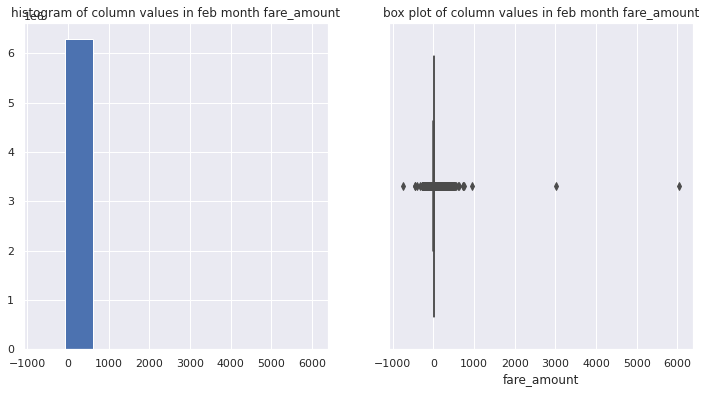

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


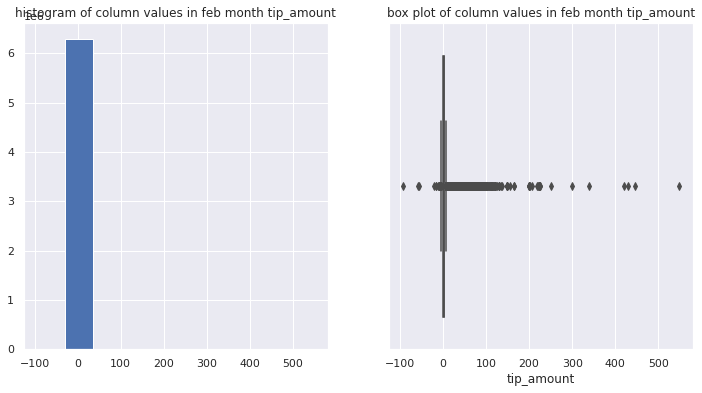

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


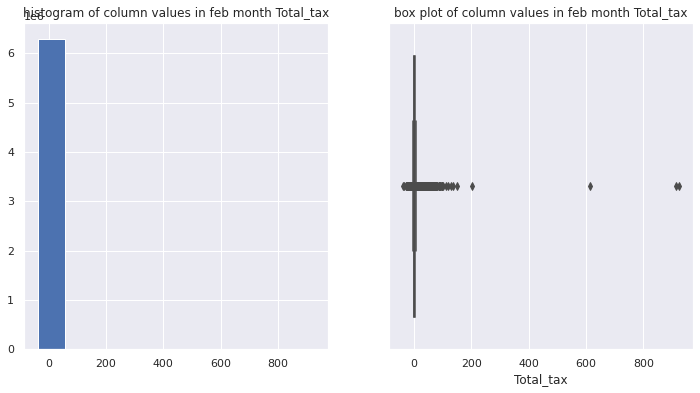

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


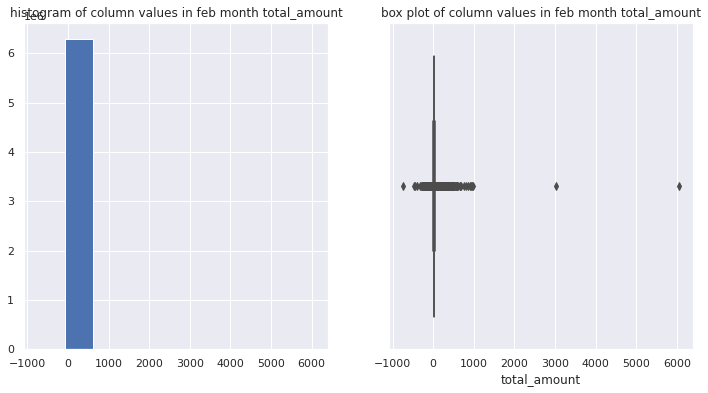

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


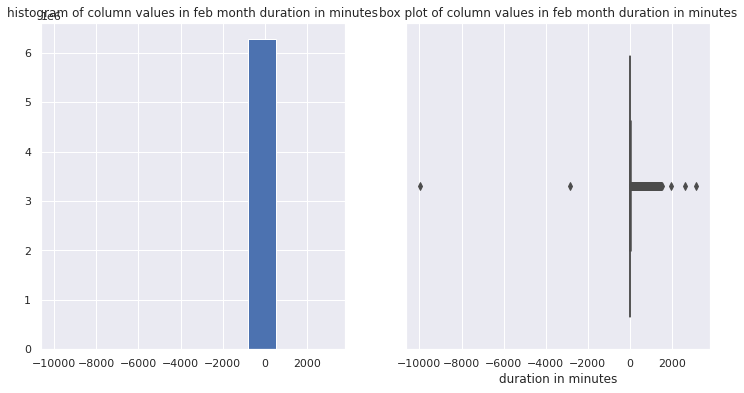

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


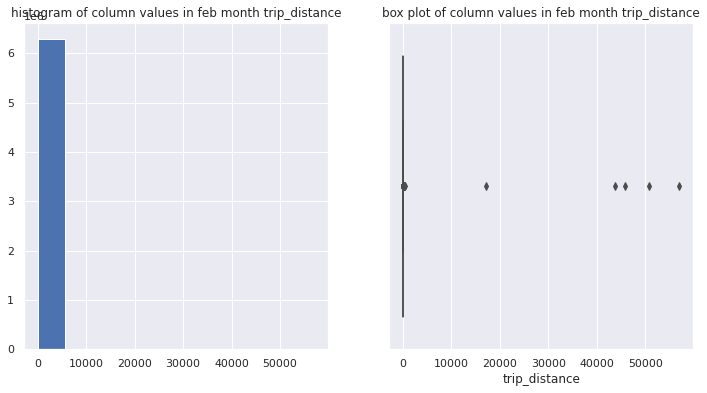

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


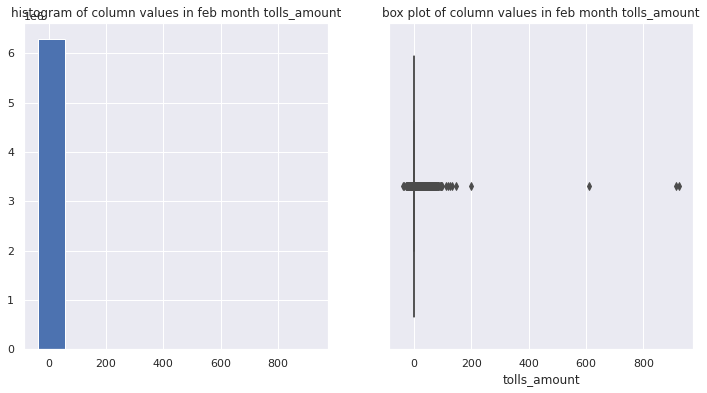

In [ ]:
# for loop for continuous_columns (feb month dataset) variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(yellow_tripdata_feb_remove_nan[feature])
    ax[0].set_title('histogram of column values in feb month '+feature)
    sns.boxplot(yellow_tripdata_feb_remove_nan[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in feb month '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


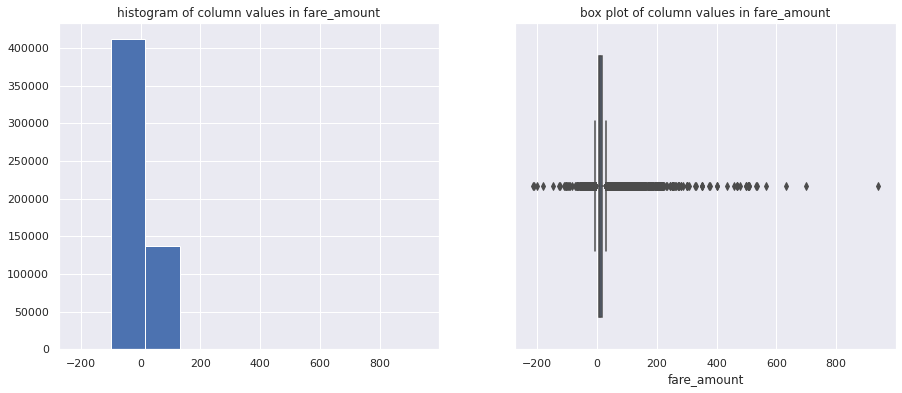

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


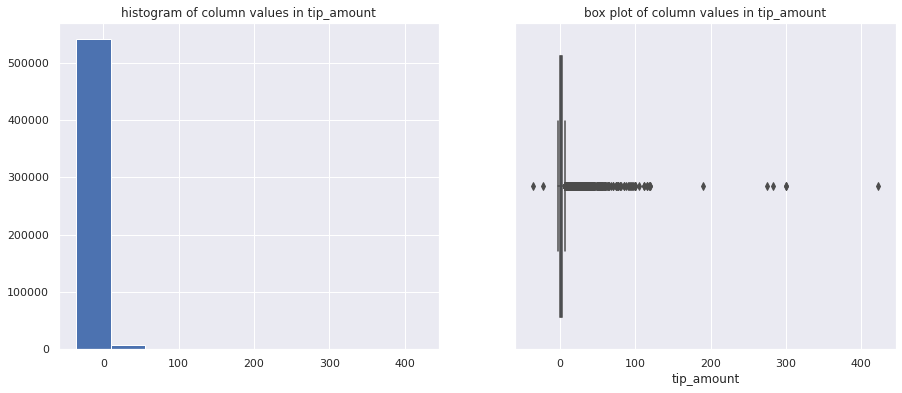

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


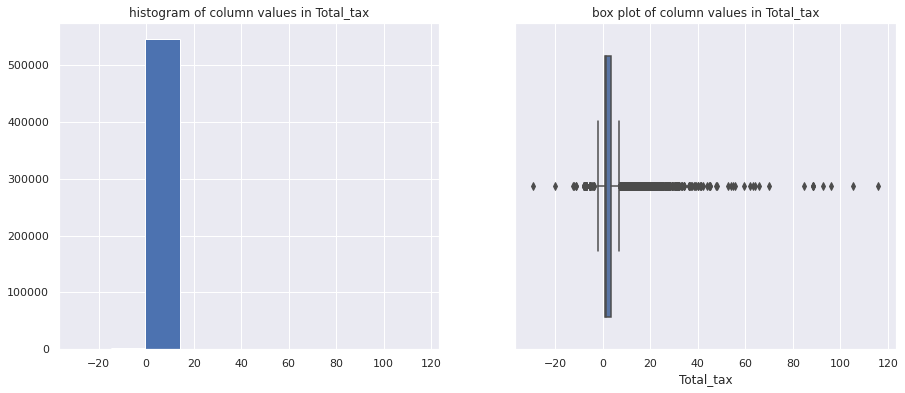

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


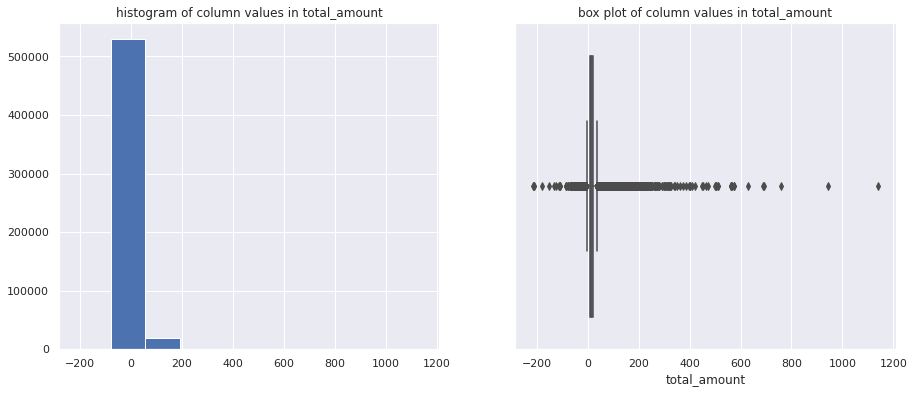

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


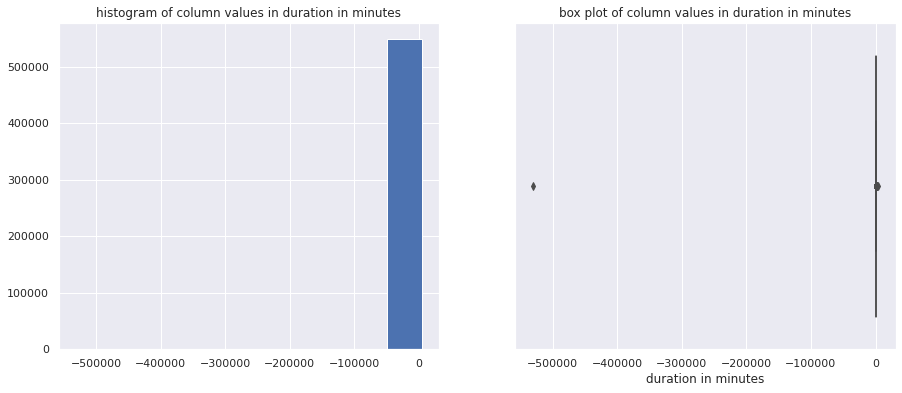

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


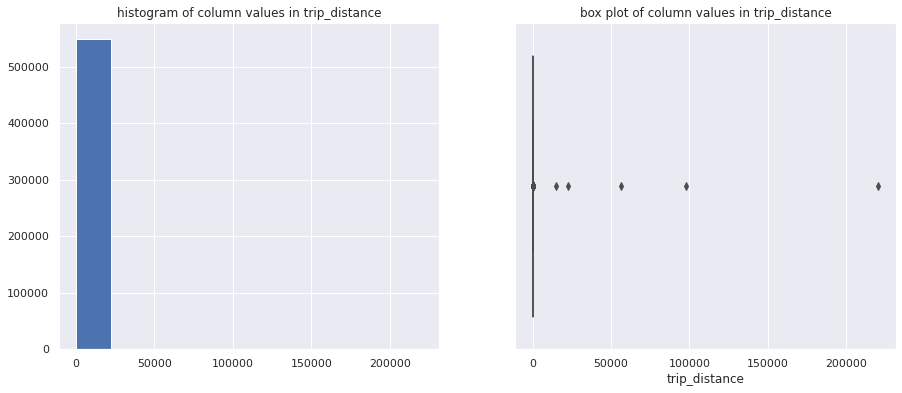

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


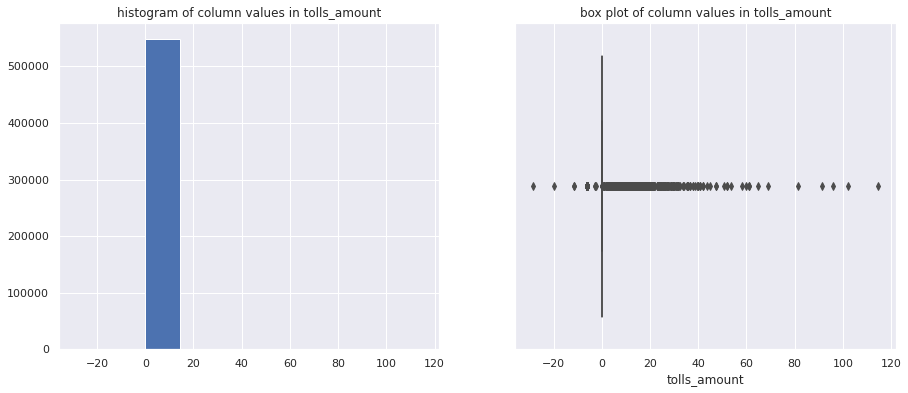

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(15,6))
    ax[0].hist(yellow_tripdata_june_remove_nan[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(yellow_tripdata_june_remove_nan[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

# **Analysis 1:-**
in both month dataset negative vakues occred in most of columns like tolls amount fare amount duration in minutes.. it is never possible so we are data cleaning via certain condtion so that data analyse give better result.

In [ ]:
print(yellow_tripdata_feb_remove_nan.loc[yellow_tripdata_feb_remove_nan['fare_amount']<0].shape)
print(yellow_tripdata_feb_remove_nan.loc[yellow_tripdata_feb_remove_nan['Total_tax']<0].shape)
print(yellow_tripdata_feb_remove_nan.loc[yellow_tripdata_feb_remove_nan['tip_amount']<0].shape)
print(yellow_tripdata_feb_remove_nan.loc[yellow_tripdata_feb_remove_nan['total_amount']<0].shape)
print(yellow_tripdata_feb_remove_nan.loc[yellow_tripdata_feb_remove_nan['duration in minutes']<0].shape)
print(yellow_tripdata_feb_remove_nan.loc[yellow_tripdata_feb_remove_nan['tolls_amount']<0].shape)


(20007, 18)
(19983, 18)
(177, 18)
(20000, 18)
(33, 18)
(403, 18)


In [ ]:
print(yellow_tripdata_june_remove_nan.loc[yellow_tripdata_june_remove_nan['fare_amount']<0].shape)
print(yellow_tripdata_june_remove_nan.loc[yellow_tripdata_june_remove_nan['Total_tax']<0].shape)
print(yellow_tripdata_june_remove_nan.loc[yellow_tripdata_june_remove_nan['tip_amount']<0].shape)
print(yellow_tripdata_june_remove_nan.loc[yellow_tripdata_june_remove_nan['total_amount']<0].shape)
print(yellow_tripdata_june_remove_nan.loc[yellow_tripdata_june_remove_nan['duration in minutes']<0].shape)
print(yellow_tripdata_june_remove_nan.loc[yellow_tripdata_june_remove_nan['tolls_amount']<0].shape)


(2544, 18)
(2507, 18)
(33, 18)
(2531, 18)
(2, 18)
(50, 18)


In [ ]:
yellow_tripdata_feb_remove_nan_remove_negative_values =yellow_tripdata_feb_remove_nan.loc[yellow_tripdata_feb_remove_nan['fare_amount']>0]

In [ ]:
yellow_tripdata_feb_remove_nan_remove_negative_values_dom = yellow_tripdata_feb_remove_nan_remove_negative_values.loc[yellow_tripdata_feb_remove_nan_remove_negative_values['duration in minutes']>0]

In [ ]:
yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax = yellow_tripdata_feb_remove_nan_remove_negative_values_dom.loc[yellow_tripdata_feb_remove_nan_remove_negative_values_dom['Total_tax']>0]

In [ ]:
yellow_tripdata_june_remove_nan_remove_negative_values =yellow_tripdata_june_remove_nan.loc[yellow_tripdata_june_remove_nan['fare_amount']>0]


In [ ]:
yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax =yellow_tripdata_june_remove_nan_remove_negative_values.loc[yellow_tripdata_june_remove_nan_remove_negative_values['Total_tax']>0]


In [ ]:
yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom = yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax.loc[yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax['duration in minutes']>0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


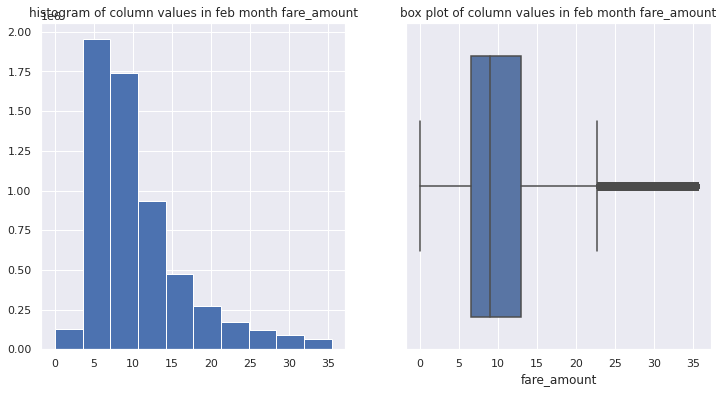

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


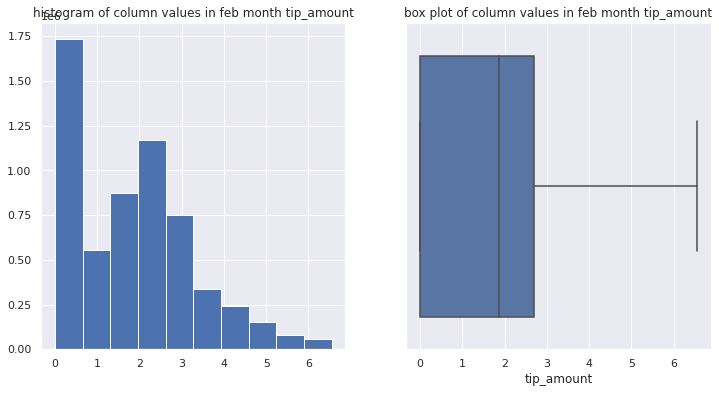

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


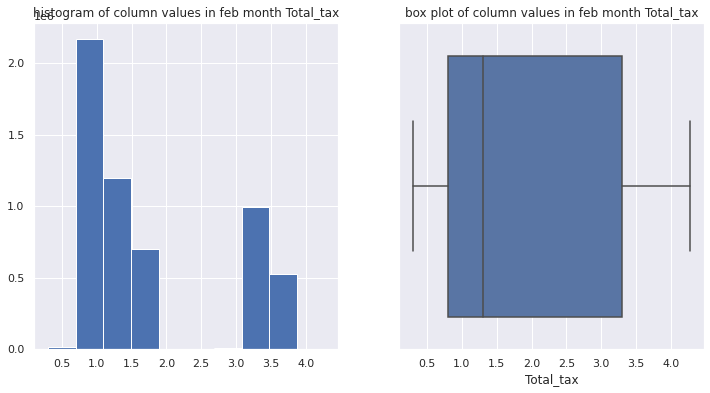

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


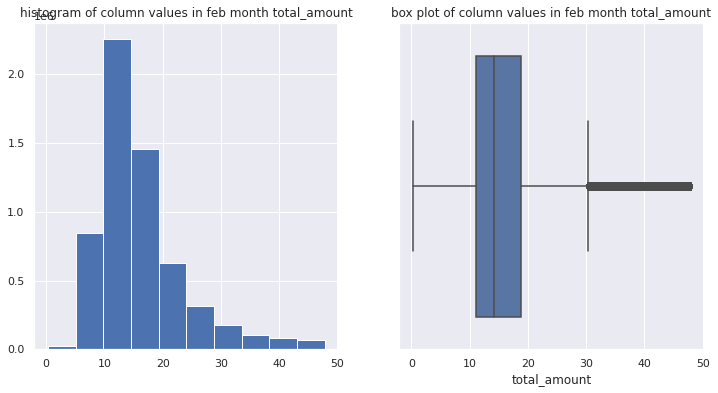

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


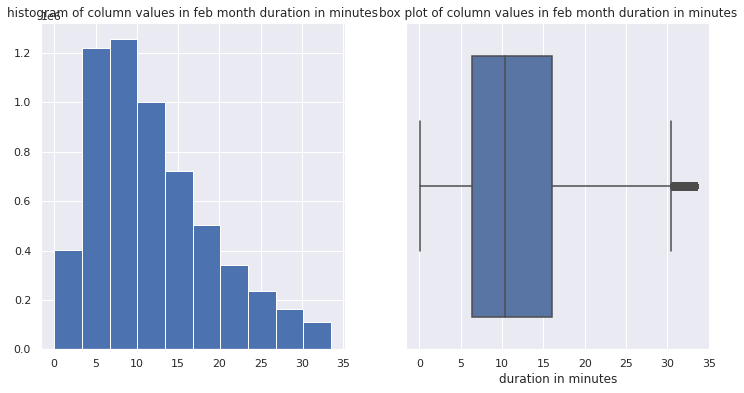

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


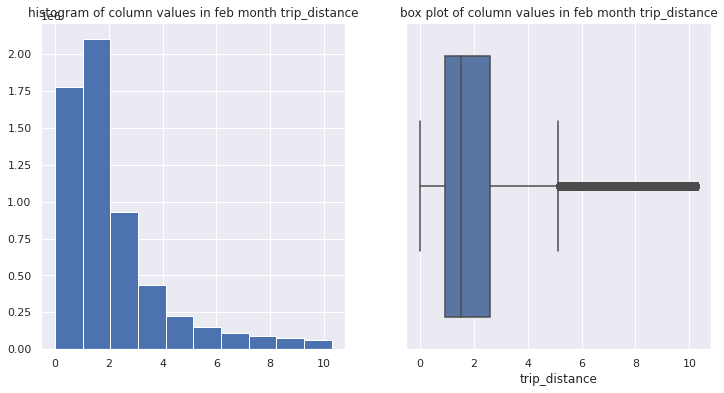

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


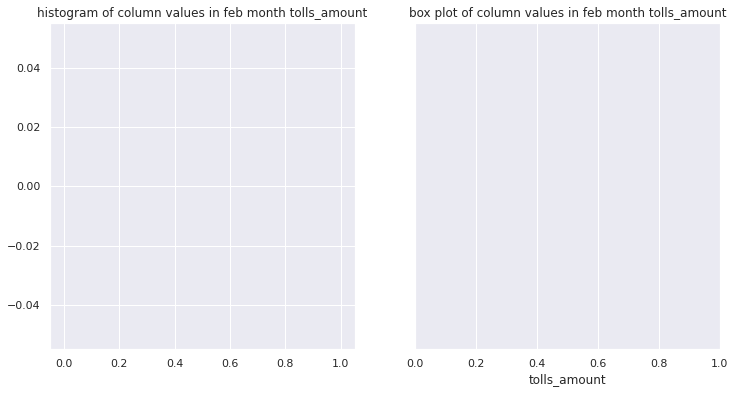

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    # removing the outliers
    feature_data_percentile = yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax[feature].quantile(0.95)
    feature_data = yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax.loc[yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax[feature]<feature_data_percentile,feature]
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(feature_data)
    ax[0].set_title('histogram of column values in feb month '+feature)
    sns.boxplot(feature_data,ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in feb month '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

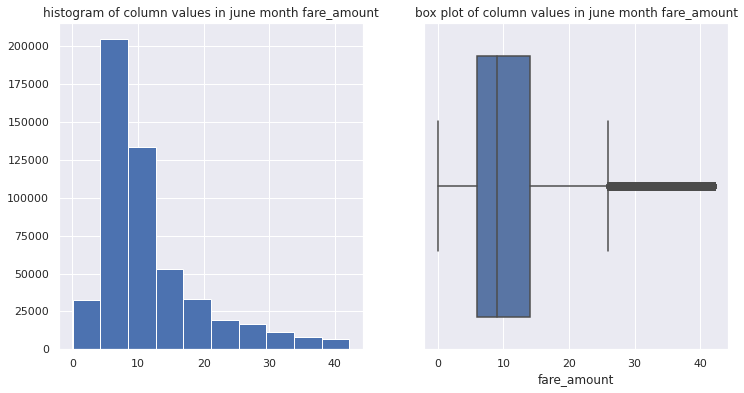

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


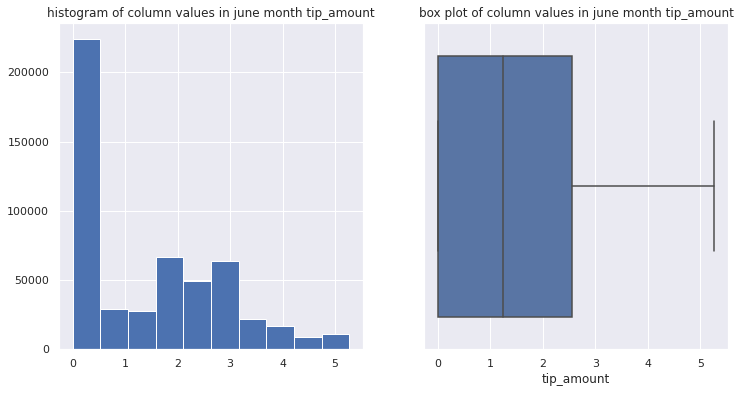

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


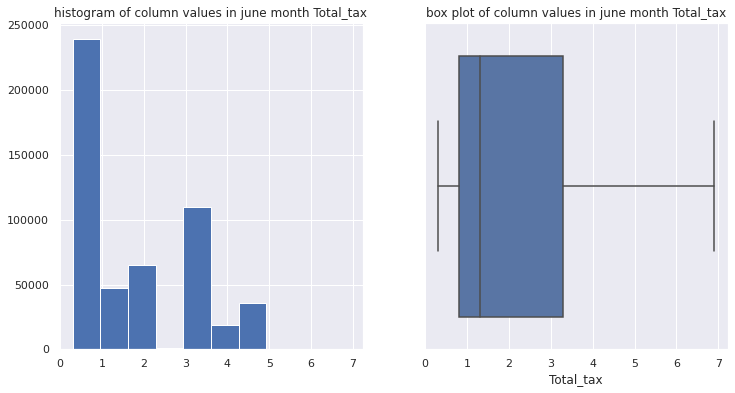

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


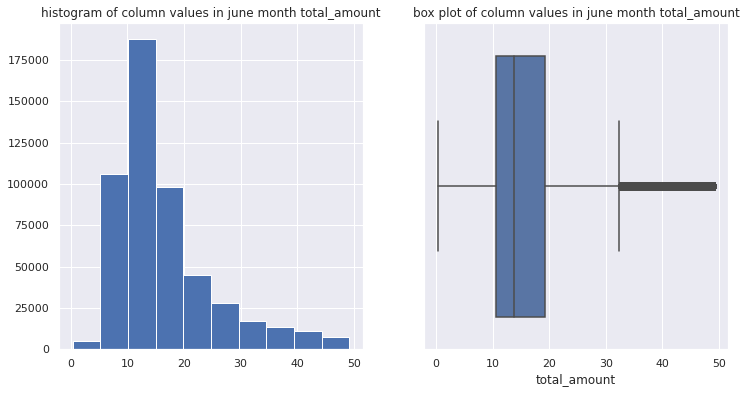

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


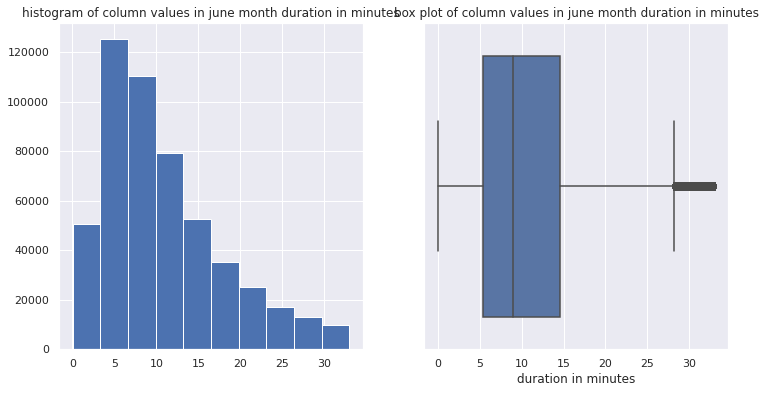

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


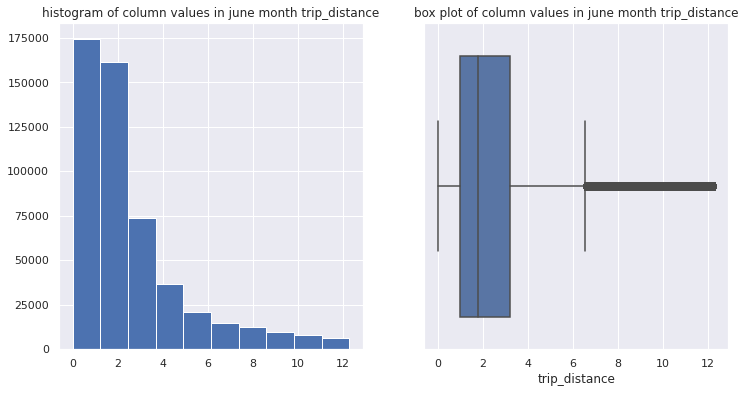

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


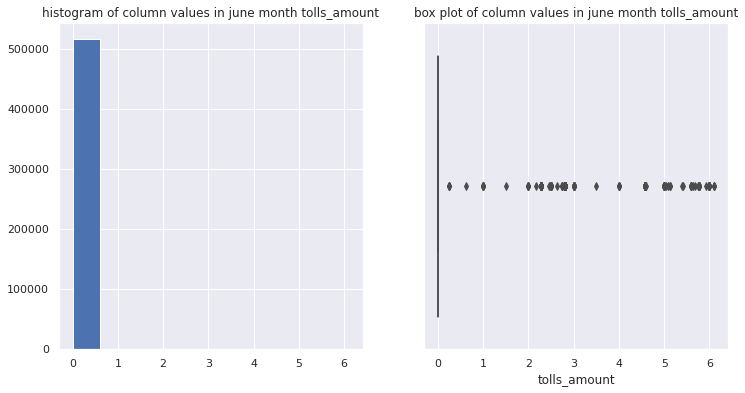

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    # removing the outliers
    feature_data_percentile = yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom[feature].quantile(0.95)
    feature_data = yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom.loc[yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom[feature]<feature_data_percentile,feature]
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(feature_data)
    ax[0].set_title('histogram of column values in june month '+feature)
    sns.boxplot(feature_data,ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in june month '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()



# Categorical **data**

In [ ]:
yellow_tripdata_feb_remove_nan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299367 entries, 0 to 6299366
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           object        
 7   fare_amount            float64       
 8   tip_amount             float64       
 9   tolls_amount           float64       
 10  total_amount           float64       
 11  congestion_surcharge   float64       
 12  pickup_day             object        
 13  dropff_day             object        
 14  pickup_hour            int64         
 15  dropoff_hour           int64         
 16  duration in minutes    float64       
 17  Total_tax              float64       
dtypes: datetime64[ns](2), 

In [ ]:
yellow_tripdata_june_remove_nan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549797 entries, 0 to 549796
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   549797 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  549797 non-null  datetime64[ns]
 2   passenger_count        549797 non-null  float64       
 3   trip_distance          549797 non-null  float64       
 4   PULocationID           549797 non-null  int64         
 5   DOLocationID           549797 non-null  int64         
 6   payment_type           549797 non-null  object        
 7   fare_amount            549797 non-null  float64       
 8   tip_amount             549797 non-null  float64       
 9   tolls_amount           549797 non-null  float64       
 10  total_amount           549797 non-null  float64       
 11  congestion_surcharge   549797 non-null  float64       
 12  pickup_day             549797 non-null  obje

In [ ]:
categorical_variables = ['payment_type','pickup_day','dropff_day','dropoff_hour','trip_day','PULocationID','DOLocationID','duration in minutes']

In [ ]:
# function for mapping numerical payment_type to actual payment(Feb and June month)
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
yellow_tripdata_feb['payment_type'] = yellow_tripdata_feb.payment_type.apply(lambda x:map_payment_type(x))
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
yellow_tripdata_june['payment_type'] = yellow_tripdata_june.payment_type.apply(lambda x:map_payment_type(x))

In [ ]:
# but this is a series for ease of plotting we need to use dataframe using .reset_index() on value_counts()
payment_type_category_count_feb = yellow_tripdata_feb['payment_type'].value_counts().reset_index()
# print the above dataframe
payment_type_category_count_feb

,index,payment_type
0,Credit_card,4705735
1,Cash,1494468
2,Voided_trip,48834
3,No_charge,32081
4,Dispute,18249


In [ ]:
#same process follow for the month of june
payment_type_category_count_june = yellow_tripdata_june['payment_type'].value_counts().reset_index()
payment_type_category_count_june

,index,payment_type
0,Credit_card,322582
1,Cash,168953
2,Voided_trip,50718
3,No_charge,5257
4,Dispute,2275
5,Unknown,12


In [ ]:
# we are shown the count under each category but it is better to have count% for comparison - create count_percent col
payment_type_category_count_feb['count_percent'] = (payment_type_category_count_feb['payment_type']/yellow_tripdata_feb.shape[0])*100
payment_type_category_count_june['count_percent'] = (payment_type_category_count_june['payment_type']/yellow_tripdata_june.shape[0])*100

# print the data frame(feb month)
payment_type_category_count_feb

,index,payment_type,count_percent
0,Credit_card,4705735,74.701712
1,Cash,1494468,23.724098
2,Voided_trip,48834,0.775221
3,No_charge,32081,0.509273
4,Dispute,18249,0.289696


In [ ]:
# print the data frame(june month)
payment_type_category_count_june

,index,payment_type,count_percent
0,Credit_card,322582,58.672928
1,Cash,168953,30.730069
2,Voided_trip,50718,9.224859
3,No_charge,5257,0.956171
4,Dispute,2275,0.413789
5,Unknown,12,0.002183


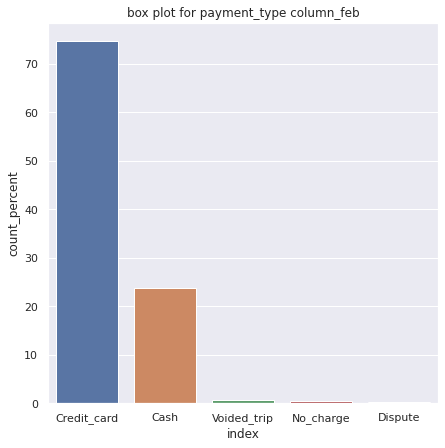

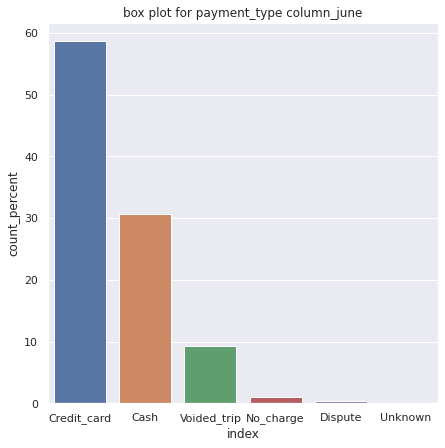

In [ ]:
# now let's plot it as bar chart(Feb month)
# first step - create fig, ax object using plt.subplots
fig,ax = plt.subplots(figsize=(7,7))
# second step - use sns.barplot(x, y , data, ax) for plotting bar plot
sns.barplot(x = 'index', y = 'count_percent', data=payment_type_category_count_feb,ax=ax)
# third step - use ax object to change plot properties - here we set a title with ax.set_title()
ax.set_title('box plot for payment_type column_feb')
# third step - seaborn style setting
sns.set()
# fourth step - use plt.show() for showing the plots
plt.show()


# june month  bar chart
# first step - create fig, ax object using plt.subplots
fig,ax = plt.subplots(figsize=(7,7))
# second step - use sns.barplot(x, y , data, ax) for plotting bar plot
sns.barplot(x = 'index', y = 'count_percent', data=payment_type_category_count_june,ax=ax)
# third step - use ax object to change plot properties - here we set a title with ax.set_title()
ax.set_title('box plot for payment_type column_june')
# third step - seaborn style setting
sns.set()
# fourth step - use plt.show() for showing the plots
plt.show()

Number of categories in feature for feb pickup_day is 7


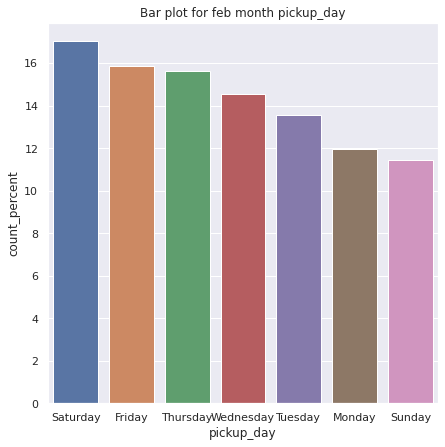

Number of categories in feature for feb pickup_hour is 24


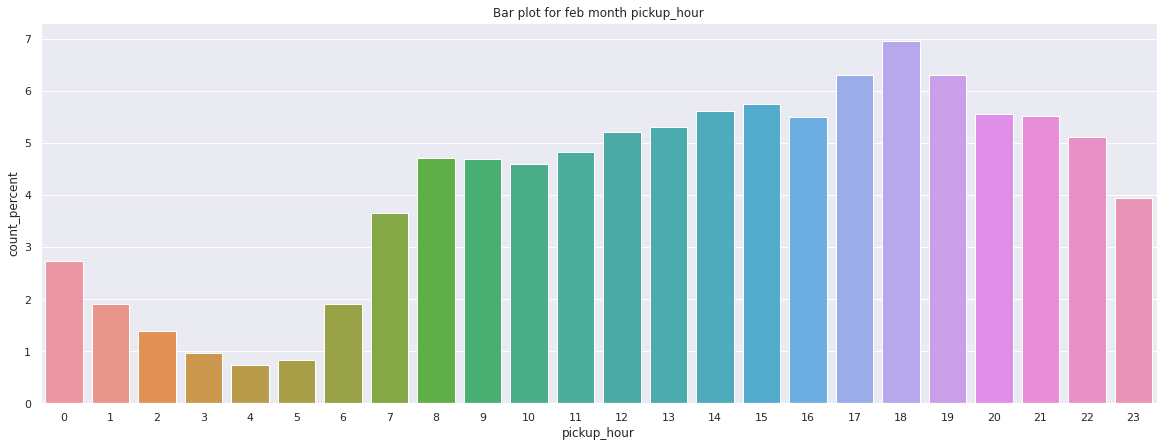

Number of categories in feature for june pickup_day is 7


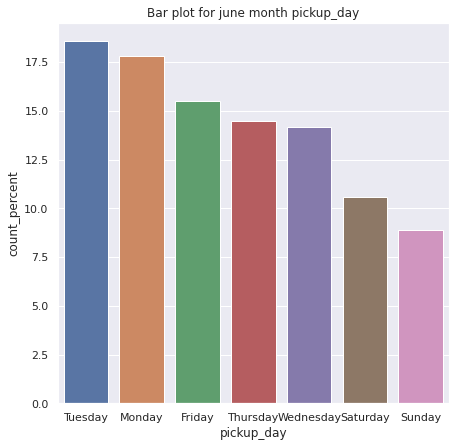

Number of categories in feature for june pickup_hour is 24


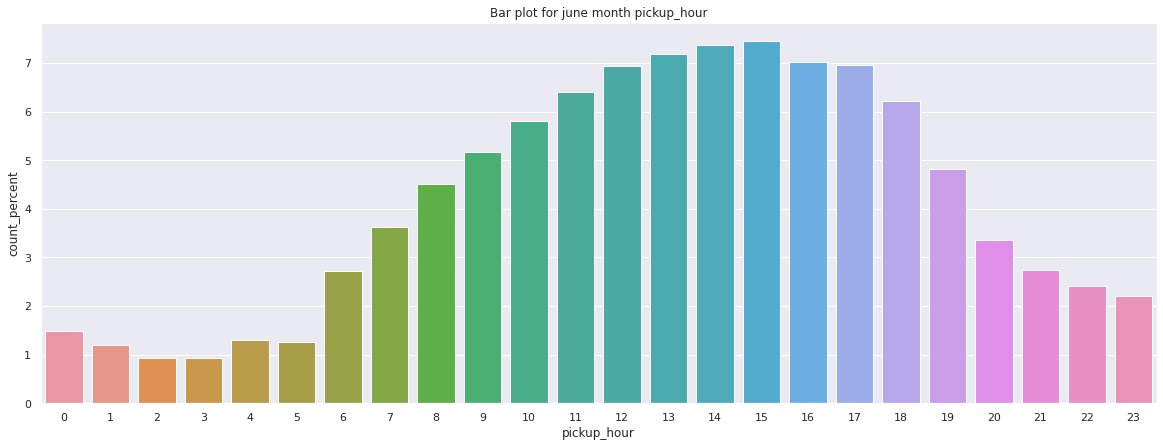

In [ ]:
# now let's plot all the time based categorical variables in this way using a for loop(Feb)
for feature in ['pickup_day','pickup_hour']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts_feb = yellow_tripdata_feb[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts_feb['count_percent'] = (feature_value_counts_feb[feature]/yellow_tripdata_feb.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature for feb '+ feature + ' is ' + str(feature_value_counts_feb.shape[0]))
    # Create fig,ax object using plt.subplots 
    if feature_value_counts_feb.shape[0]<10:
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        fig,ax = plt.subplots(figsize=(20,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts_feb,ax=ax)
    # set_title
    ax.set_title('Bar plot for feb month '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()
# now let's plot all the time based categorical variables in this way using a for loop(june)
for feature in ['pickup_day','pickup_hour']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts_june = yellow_tripdata_june[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts_june['count_percent'] = (feature_value_counts_june[feature]/yellow_tripdata_june.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature for june '+ feature + ' is ' + str(feature_value_counts_june.shape[0]))
    # Create fig,ax object using plt.subplots 
    if feature_value_counts_june.shape[0]<10:
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        fig,ax = plt.subplots(figsize=(20,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts_june,ax=ax)
    # set_title
    ax.set_title('Bar plot for june month '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

In [ ]:
# let's see the number of categories available in both pickup and dropoff location - PULocationID and DOLocationID
print(yellow_tripdata_feb['PULocationID'].value_counts().shape)
print(yellow_tripdata_feb['DOLocationID'].value_counts().shape)

(259,)
(261,)


Number of categories in feature febPULocationID is 259


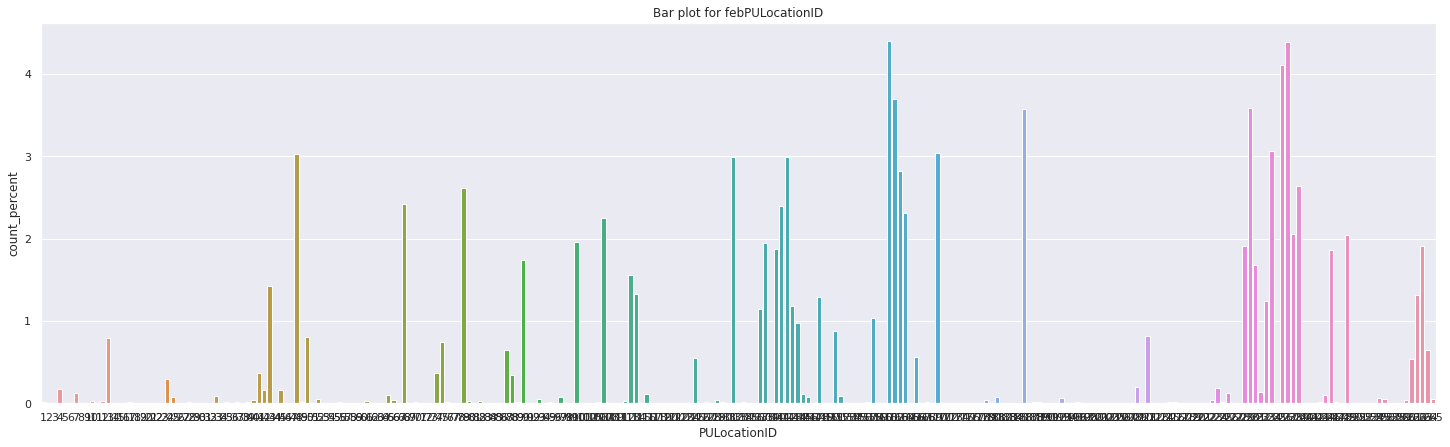

Number of categories in feature febDOLocationID is 261


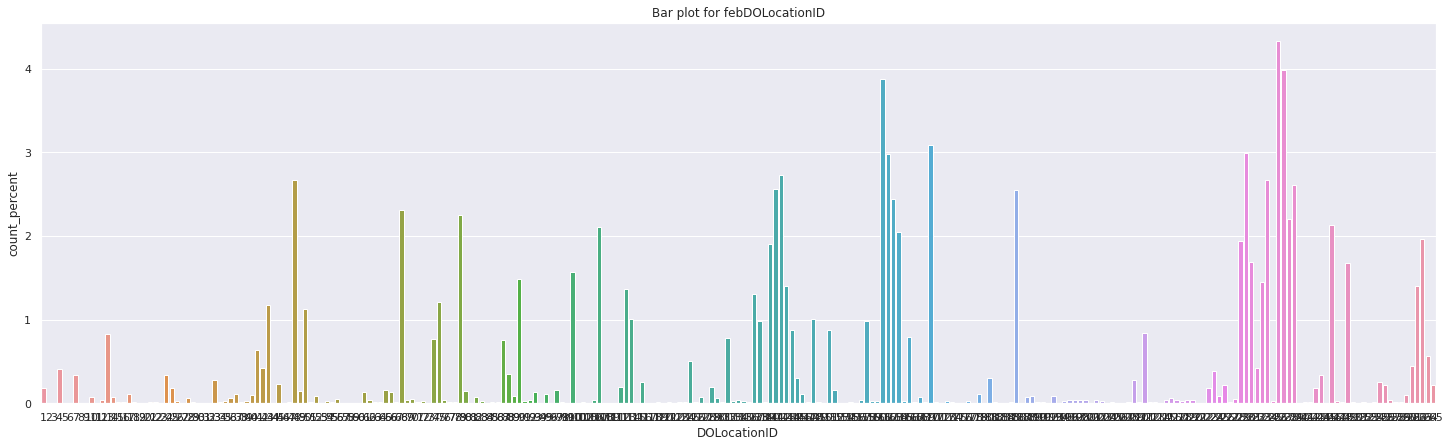

Number of categories in feature june PULocationID is 257


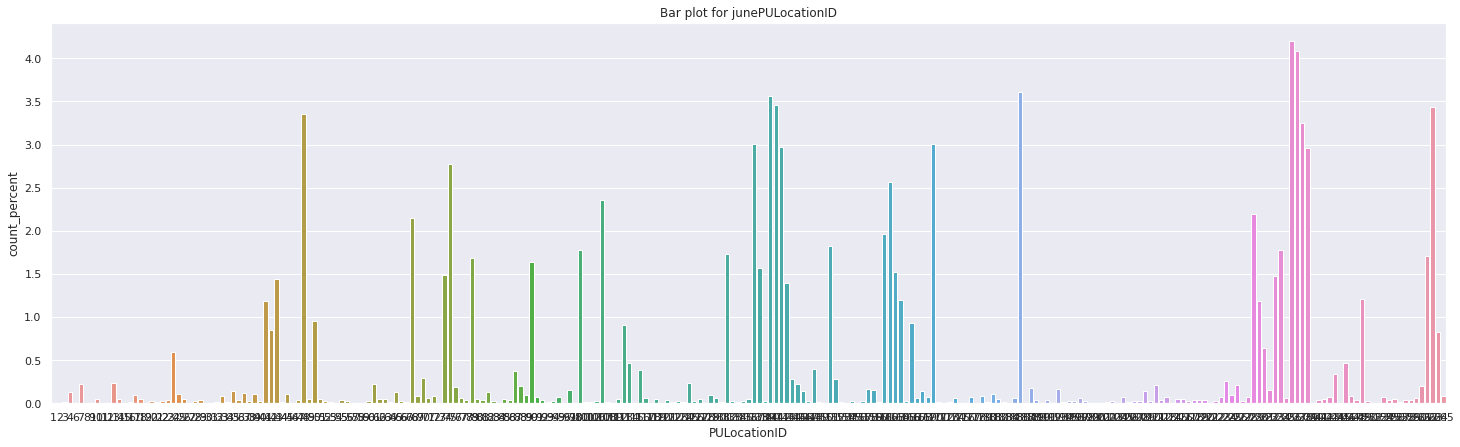

Number of categories in feature june DOLocationID is 260


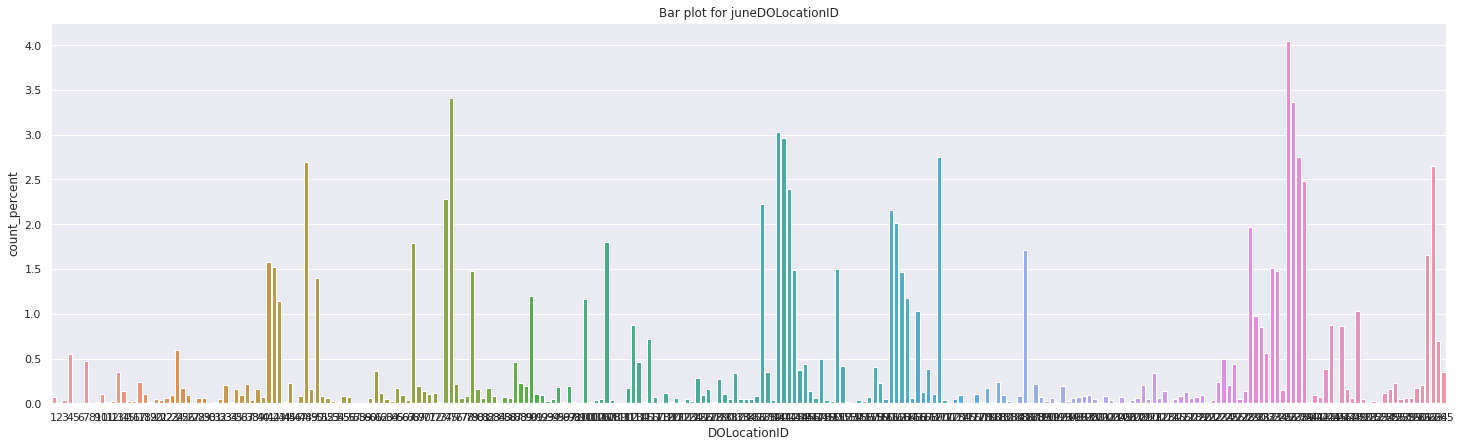

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts_feb = yellow_tripdata_feb_remove_nan[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts_feb['count_percent'] = (feature_value_counts_feb[feature]/yellow_tripdata_feb_remove_nan.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature feb'+ feature + ' is ' + str(feature_value_counts_feb.shape[0]))
    # Create fig,ax object using plt.subplots 
    fig,ax = plt.subplots(figsize=(25,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts_feb,ax=ax)
    # set_title
    ax.set_title('Bar plot for feb'+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()
for feature in ['PULocationID','DOLocationID']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts_june = yellow_tripdata_june_remove_nan[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts_june['count_percent'] = (feature_value_counts_june[feature]/yellow_tripdata_june_remove_nan.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature june '+ feature + ' is ' + str(feature_value_counts_june.shape[0]))
    # Create fig,ax object using plt.subplots 
    fig,ax = plt.subplots(figsize=(25,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts_june,ax=ax)
    # set_title
    ax.set_title('Bar plot for june'+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

Number of categories in feature PULocationID above 0.5 % count is feb 48


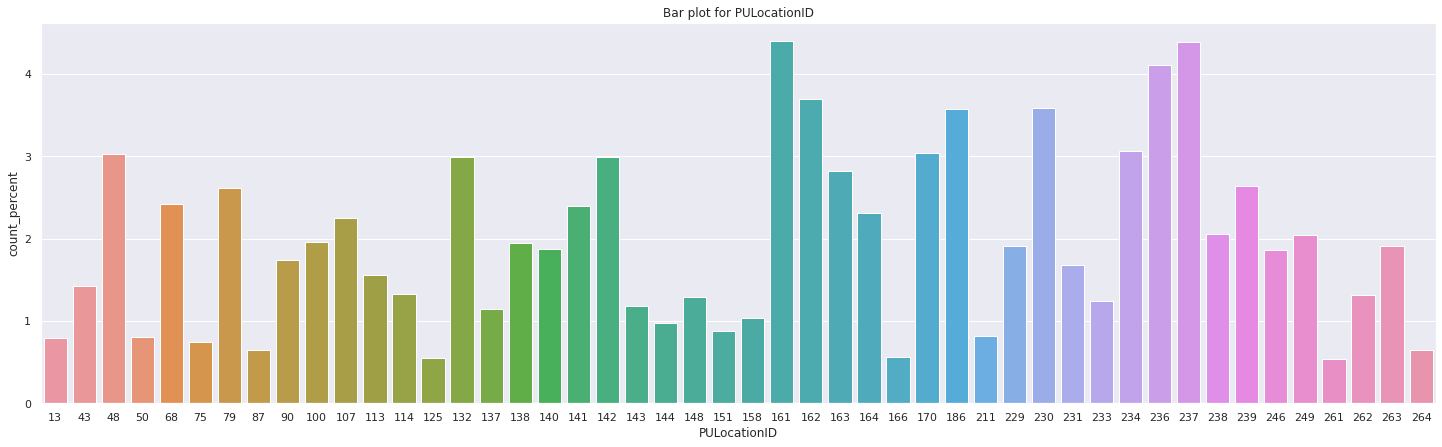

Number of categories in feature DOLocationID above 0.5 % count is feb 49


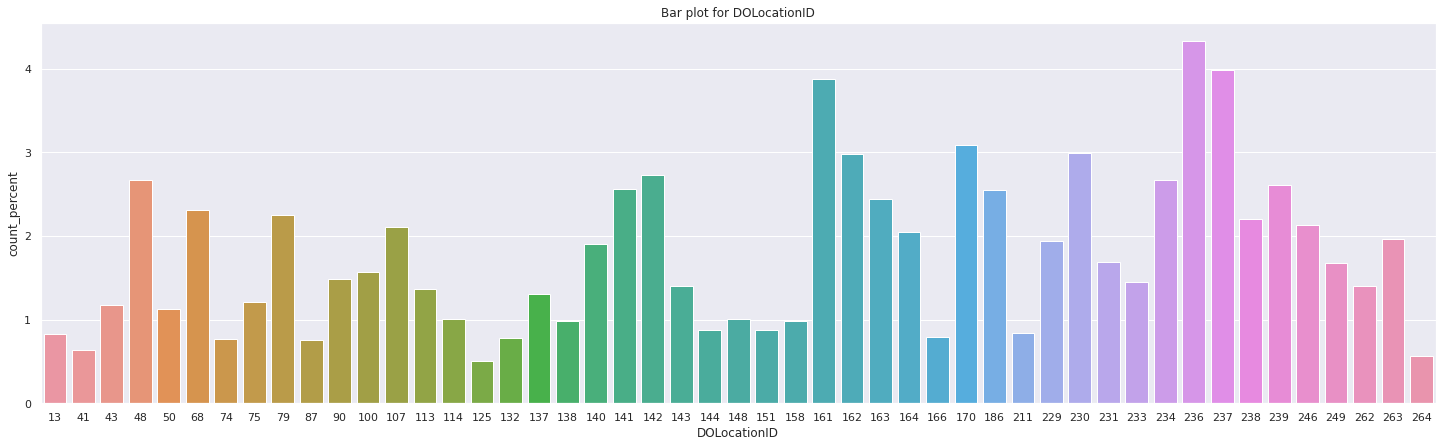

Number of categories in feature PULocationID above 0.5 % count is june 42


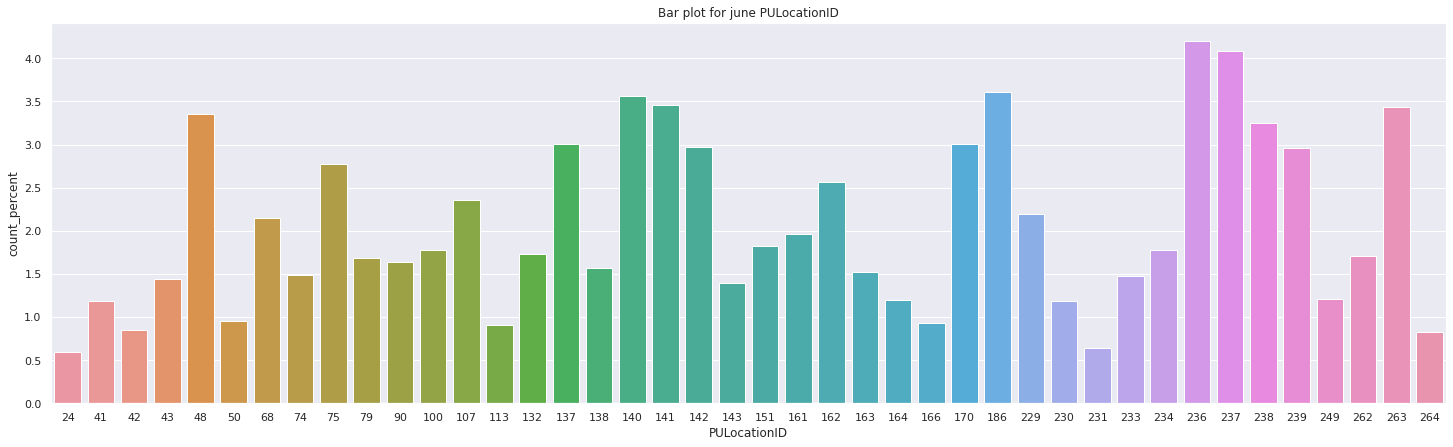

Number of categories in feature DOLocationID above 0.5 % count is june 45


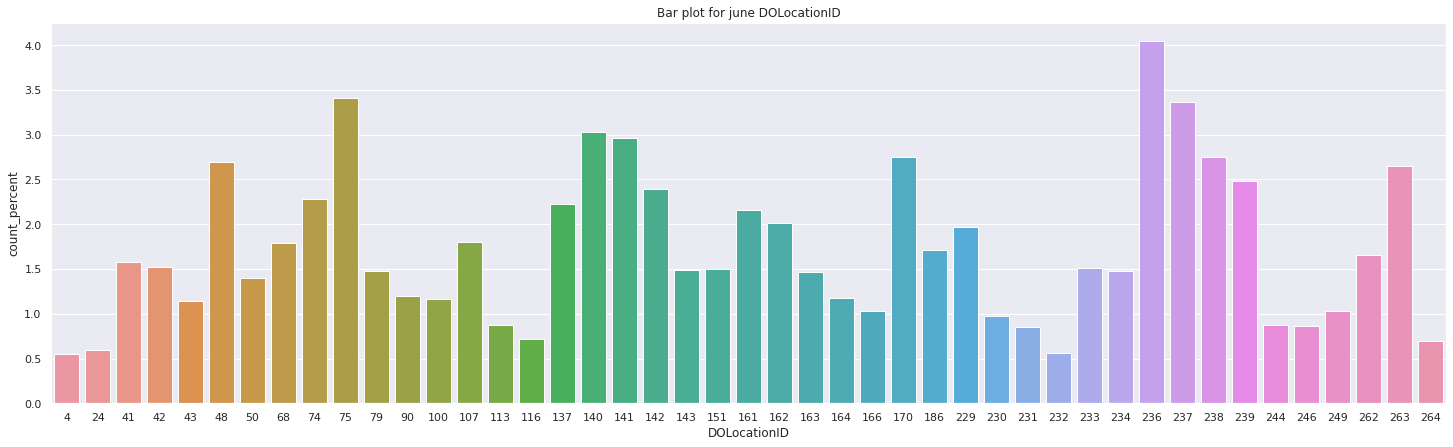

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    feature_value_counts_feb = yellow_tripdata_feb[feature].value_counts().reset_index()
    feature_value_counts_feb['count_percent'] = (feature_value_counts_feb[feature]/yellow_tripdata_feb.shape[0])*100
    # filter only those location which has more than 0.5 % of traffic
    feature_value_counts_feb = feature_value_counts_feb.loc[feature_value_counts_feb['count_percent']>=0.5]
    print('Number of categories in feature '+ feature + ' above 0.5 % count is feb ' + str(feature_value_counts_feb.shape[0]))
    fig,ax = plt.subplots(figsize=(25,7))
    sns.barplot(x='index',y='count_percent',data=feature_value_counts_feb,ax=ax)
    ax.set_title('Bar plot for '+ feature)
    ax.set_xlabel(feature)
    sns.set()
    plt.show()
for feature in ['PULocationID','DOLocationID']:
    feature_value_counts_june = yellow_tripdata_june[feature].value_counts().reset_index()
    feature_value_counts_june['count_percent'] = (feature_value_counts_june[feature]/yellow_tripdata_june.shape[0])*100
    # filter only those location which has more than 0.5 % of traffic
    feature_value_counts_june = feature_value_counts_june.loc[feature_value_counts_june['count_percent']>=0.5]
    print('Number of categories in feature '+ feature + ' above 0.5 % count is june ' + str(feature_value_counts_june.shape[0]))
    fig,ax = plt.subplots(figsize=(25,7))
    sns.barplot(x='index',y='count_percent',data=feature_value_counts_june,ax=ax)
    ax.set_title('Bar plot for june '+ feature)
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

In [ ]:
yellow_tripdata_feb['routes'] = yellow_tripdata_feb.apply(lambda x: str(x['PULocationID'])+'-'+str(x['DOLocationID']),axis=1)

In [ ]:
yellow_tripdata_feb.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,dropff_day,pickup_hour,dropoff_hour,duration in minutes,routes
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,1,11.0,0.5,0.5,...,0.0,0.3,14.75,0.0,Saturday,Saturday,0,0,12.950000,145-7
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,1,21.5,3.0,0.5,...,0.0,0.3,31.60,2.5,Saturday,Saturday,0,1,32.816667,45-61
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,1,11.0,3.0,0.5,...,0.0,0.3,15.80,2.5,Saturday,Saturday,0,0,11.733333,186-140
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,1,18.0,0.5,0.5,...,0.0,0.3,24.80,2.5,Saturday,Saturday,0,0,24.066667,144-140
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,2,9.5,0.5,0.5,...,0.0,0.3,10.80,0.0,Saturday,Saturday,0,1,9.766667,238-152


In [ ]:
yellow_tripdata_june['routes'] = yellow_tripdata_june.apply(lambda x: str(x['PULocationID'])+'-'+str(x['DOLocationID']),axis=1)

In [ ]:
yellow_tripdata_june.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,dropff_day,pickup_hour,dropoff_hour,duration in minutes,routes
0,2020-06-01 00:31:23,2020-06-01 00:49:58,1.0,3.6,140,68,1,15.5,3.0,0.5,...,0.0,0.3,23.30,2.5,Monday,Monday,0,0,18.583333,140-68
1,2020-06-01 00:42:50,2020-06-01 01:04:33,1.0,5.6,79,226,1,19.5,3.0,0.5,...,0.0,0.3,25.30,2.5,Monday,Monday,0,1,21.716667,79-226
2,2020-06-01 00:39:51,2020-06-01 00:49:09,1.0,2.3,238,116,2,10.0,0.5,0.5,...,0.0,0.3,11.30,0.0,Monday,Monday,0,0,9.300000,238-116
3,2020-06-01 00:56:13,2020-06-01 01:11:38,1.0,5.3,141,116,2,17.5,3.0,0.5,...,0.0,0.3,21.30,2.5,Monday,Monday,0,1,15.416667,141-116
4,2020-06-01 00:16:41,2020-06-01 00:29:30,1.0,4.4,186,75,1,14.5,3.0,0.5,...,0.0,0.3,21.95,2.5,Monday,Monday,0,0,12.816667,186-75


In [ ]:
yellow_tripdata_feb['routes'].to_csv('/content/drive/My Drive/taxi_zone_feb_lookup.csv',index=False)

In [ ]:
yellow_tripdata_june['routes'].to_csv('/content/drive/My Drive/taxi_zone_june_lookup.csv',index=False)

In [ ]:
file_loc_routes_data = '/content/drive/My Drive/taxi_zone_feb_lookup.csv'
routes_data_feb = pd.read_csv(file_loc_routes_data)
# assigning new column 'routes' in trip_data to routes_data
yellow_tripdata_feb['routes'] = routes_data_feb

In [ ]:
file_loc_routes_data = '/content/drive/My Drive/taxi_zone_june_lookup.csv'
routes_data_june = pd.read_csv(file_loc_routes_data)
# assigning new column 'routes' in trip_data to routes_data
yellow_tripdata_june['routes'] = routes_data_june

Number of categories in feature routes above 0.25 % count is 13


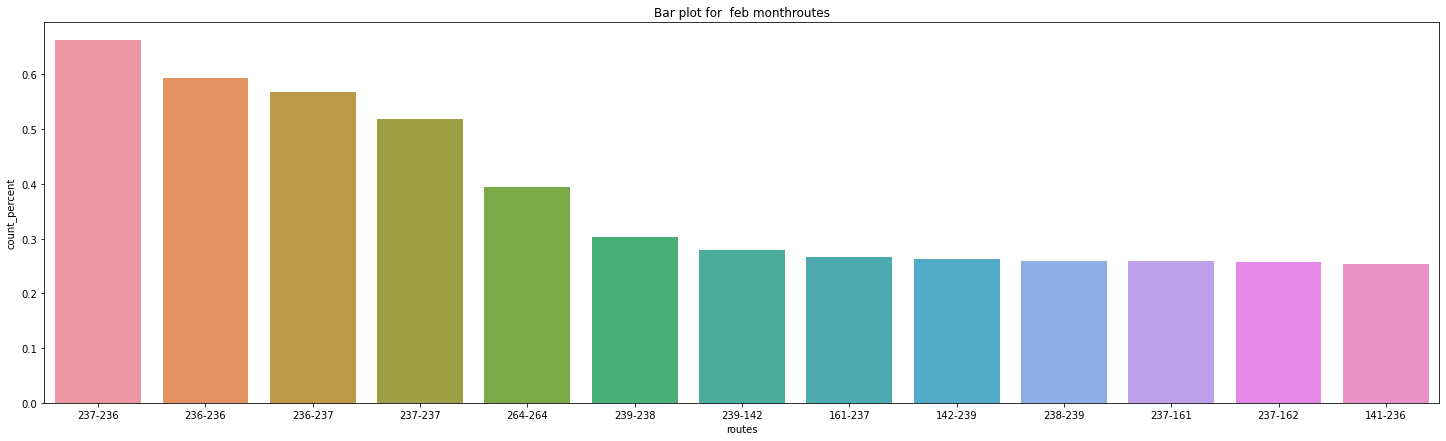

Number of categories in feature routes above 0.25 % count is 15


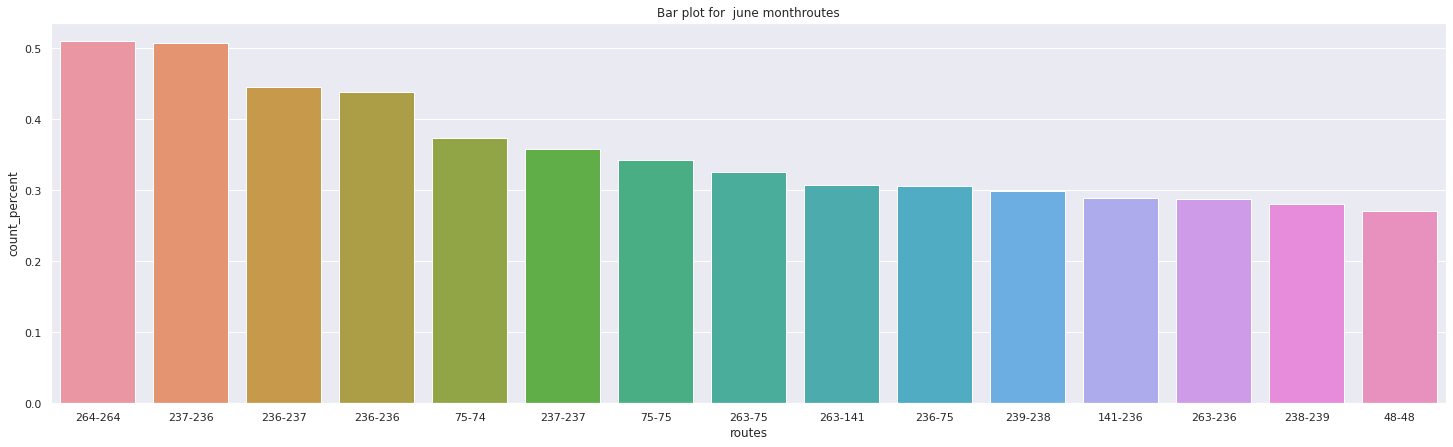

In [ ]:
# plot bar plot for feb month routes which have trip count above 0.25%
feature = 'routes'
feature_value_counts_feb = yellow_tripdata_feb[feature].value_counts().reset_index()
feature_value_counts_feb['count_percent'] = (feature_value_counts_feb[feature]/yellow_tripdata_feb.shape[0])*100
# choosing routes where the trip percent is above 0.25% of total trips
feature_value_counts_feb = feature_value_counts_feb.loc[feature_value_counts_feb['count_percent']>=0.25]
print('Number of categories in feature '+ feature + ' above 0.25 % count is ' + str(feature_value_counts_feb.shape[0]))
fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(x='index',y='count_percent',data=feature_value_counts_feb,ax=ax)
ax.set_title('Bar plot for  feb month' + feature)
ax.set_xlabel(feature)
sns.set()
plt.show()
# plot bar plot for june month routes which have trip count above 0.25%
feature = 'routes'
feature_value_counts_june = yellow_tripdata_june[feature].value_counts().reset_index()
feature_value_counts_june['count_percent'] = (feature_value_counts_june[feature]/yellow_tripdata_june.shape[0])*100
# choosing routes where the trip percent is above 0.25% of total trips
feature_value_counts_june = feature_value_counts_june.loc[feature_value_counts_june['count_percent']>=0.25]
print('Number of categories in feature '+ feature + ' above 0.25 % count is ' + str(feature_value_counts_june.shape[0]))
fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(x='index',y='count_percent',data=feature_value_counts_june,ax=ax)
ax.set_title('Bar plot for  june month' + feature)
ax.set_xlabel(feature)
sns.set()
plt.show()

# **Fare amount analysis with various features of datasets.**

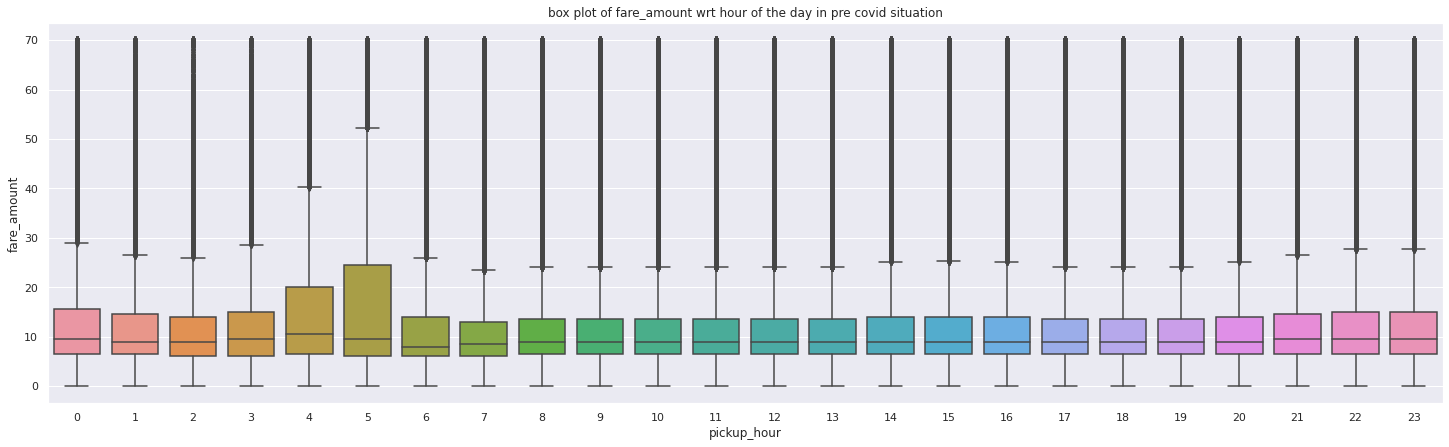

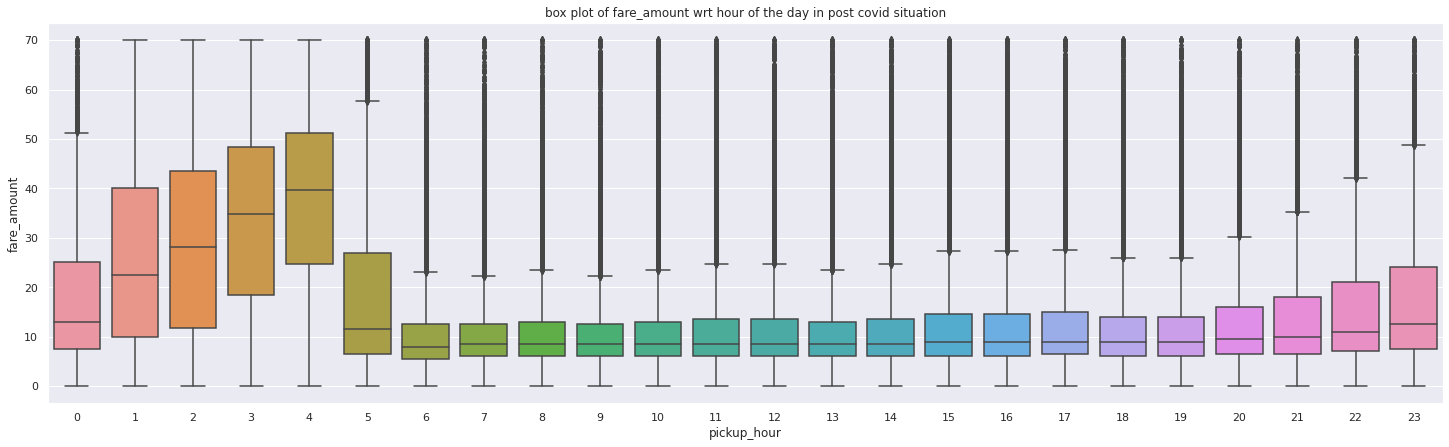

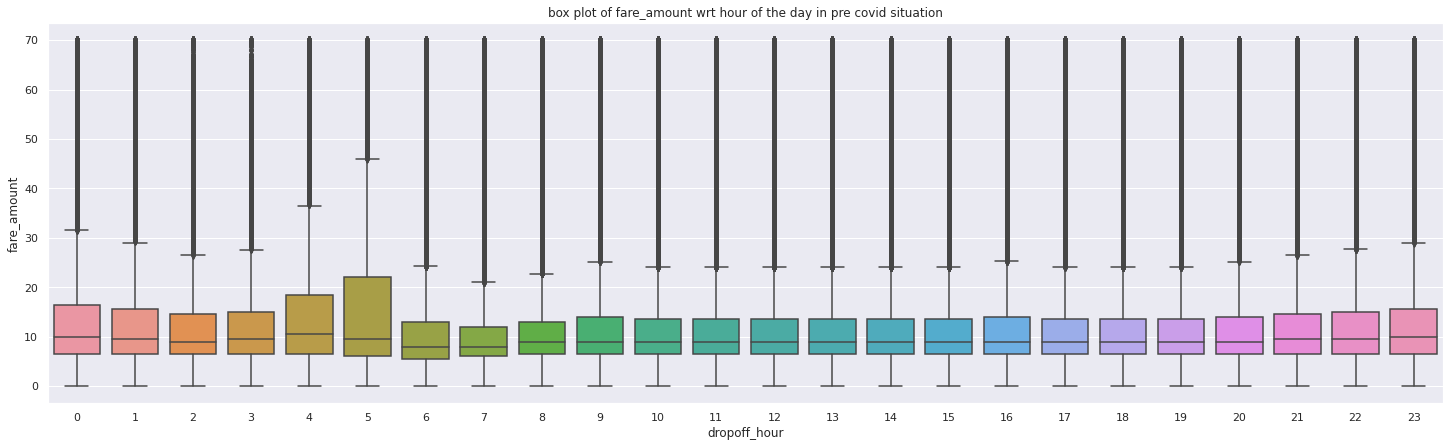

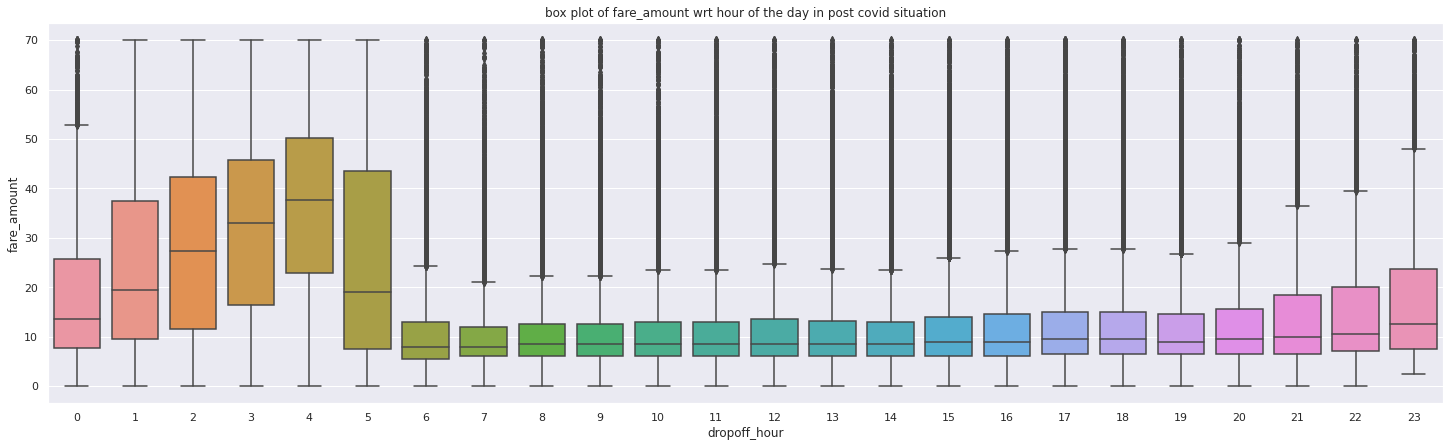

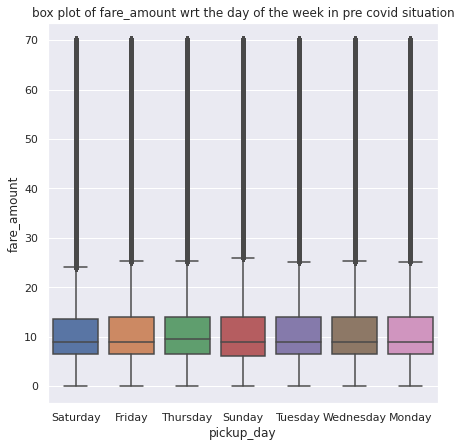

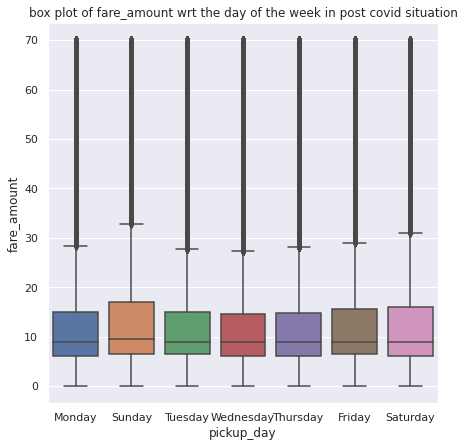

In [ ]:
#Data visulation Wrt to fare amount
restricted_fare_amount_data_feb_month = yellow_tripdata_feb_remove_nan_remove_negative_values.loc[(yellow_tripdata_feb_remove_nan_remove_negative_values['fare_amount']<=70) & (yellow_tripdata_feb_remove_nan_remove_negative_values['fare_amount']>=0)]
restricted_fare_amount_data_june_month = yellow_tripdata_june_remove_nan_remove_negative_values.loc[(yellow_tripdata_june_remove_nan_remove_negative_values['fare_amount']<=70) & (yellow_tripdata_june_remove_nan_remove_negative_values['fare_amount']>=0)]

#plot graph between pick up hours and fare amount in pre covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'pickup_hour',y='fare_amount',data=restricted_fare_amount_data_feb_month,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day in pre covid situation')
sns.set()
plt.show()

#plot graph between pick up hours and fare amount in post covid siutation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'pickup_hour',y='fare_amount',data=restricted_fare_amount_data_june_month,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day in post covid situation')
sns.set()
plt.show()

#plot graph between drop off hours and fare amount in pre covid siutation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'dropoff_hour',y='fare_amount',data=restricted_fare_amount_data_feb_month,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day in pre covid situation')
sns.set()
plt.show()

#plot graph between drop off hours and fare amount in post covid siutation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'dropoff_hour',y='fare_amount',data=restricted_fare_amount_data_june_month,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day in post covid situation')
sns.set()
plt.show()

# plot of trip_day with fare_amount in pre covid situation
fig,ax = plt.subplots(figsize=(7,7))
# changes in sns.boxplot x and y
sns.boxplot(x = 'pickup_day',y='fare_amount',data=restricted_fare_amount_data_feb_month,ax=ax)
ax.set_title('box plot of fare_amount wrt the day of the week in pre covid situation')
sns.set()
plt.show()

# plot of trip_day with fare_amount in post covid situation
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'pickup_day',y='fare_amount',data=restricted_fare_amount_data_june_month,ax=ax)
ax.set_title('box plot of fare_amount wrt the day of the week in post covid situation')
sns.set()
plt.show()

# **Data analysis of total amount WRT to varioous features of dataset**

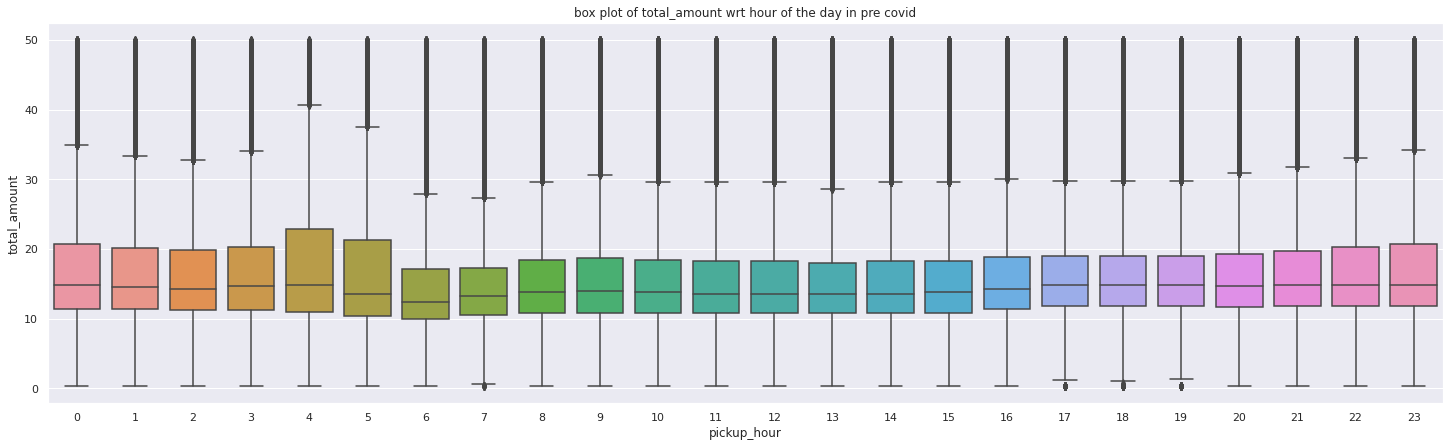

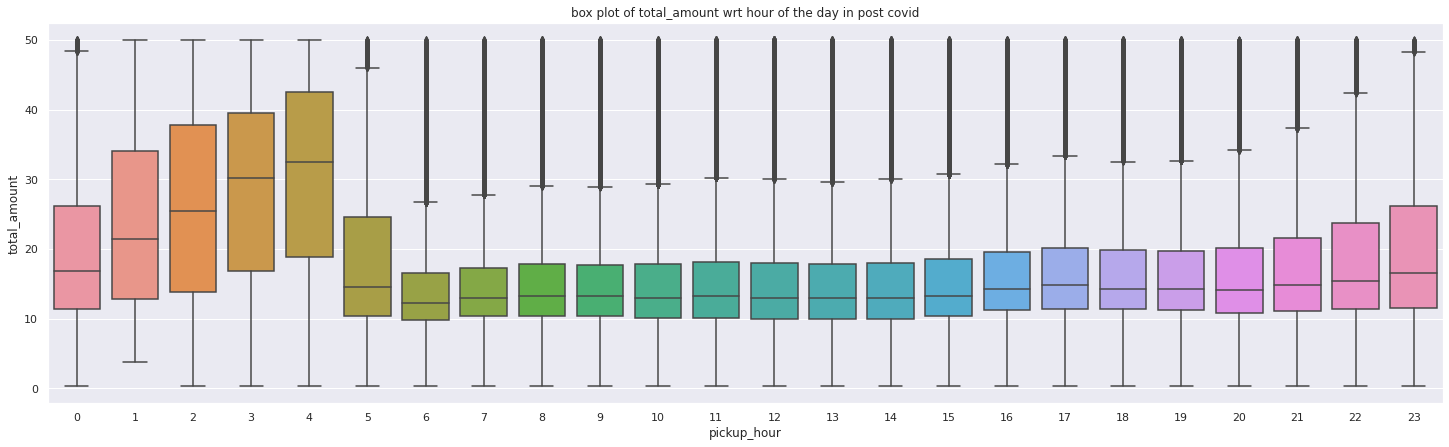

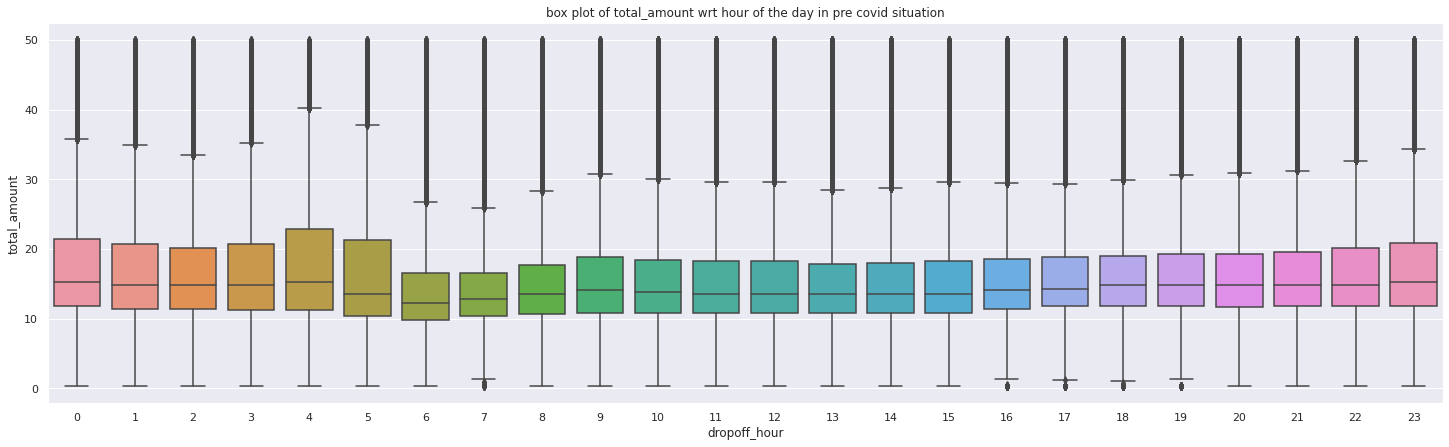

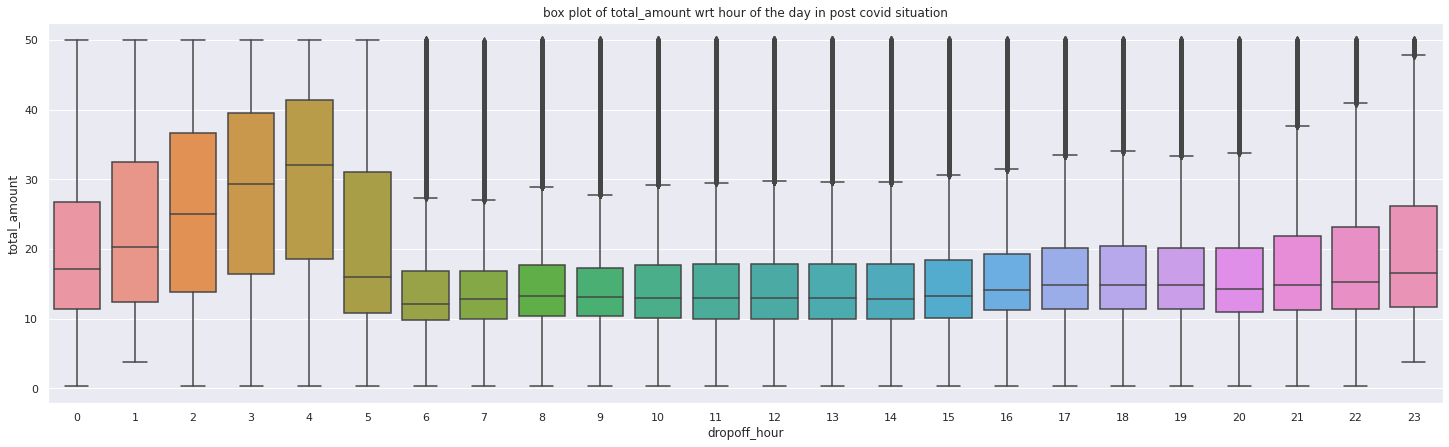

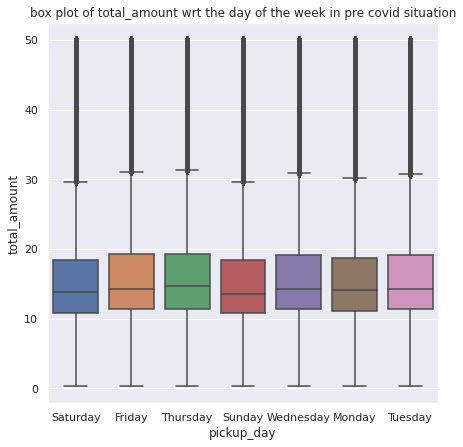

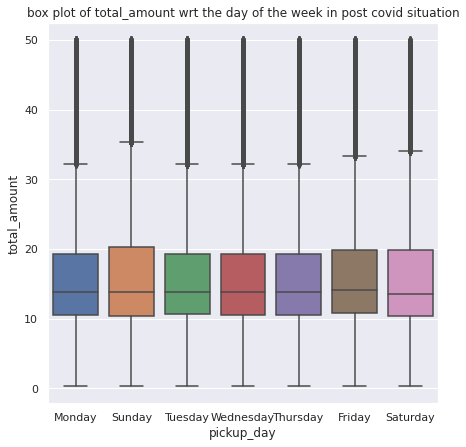

In [ ]:
#various graph plot with Total amount and cleaning of data
restricted_total_amount_data_feb_month = yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax.loc[yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax['total_amount']<=50]
restricted_total_amount_data_june_month = yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom[yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom['total_amount']<=50]

#graph plot between pick up hours and total amount in pre covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'pickup_hour',y='total_amount',data=restricted_total_amount_data_feb_month,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day in pre covid')
sns.set()
plt.show()

#graph plot between pick up hour and total amount post covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'pickup_hour',y='total_amount',data=restricted_total_amount_data_june_month,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day in post covid')
sns.set()
plt.show()

#graph plot between drop off hour and total amount in pre covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'dropoff_hour',y='total_amount',data=restricted_total_amount_data_feb_month,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day in pre covid situation')
sns.set()
plt.show()

#graph plot between drop off hour and total amount in post covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'dropoff_hour',y='total_amount',data=restricted_total_amount_data_june_month,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day in post covid situation')
sns.set()
plt.show()
#graph plot between  pick up day and total amount in pre covid situation
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'pickup_day',y='total_amount',data=restricted_total_amount_data_feb_month,ax=ax)
ax.set_title('box plot of total_amount wrt the day of the week in pre covid situation')
sns.set()
plt.show()
#graph plot between  pick up day and total amount in post covid situation
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'pickup_day',y='total_amount',data=restricted_total_amount_data_june_month,ax=ax)
ax.set_title('box plot of total_amount wrt the day of the week in post covid situation')
sns.set()
plt.show()

# **Data analysis of Tip amount wrt various features of datasets**

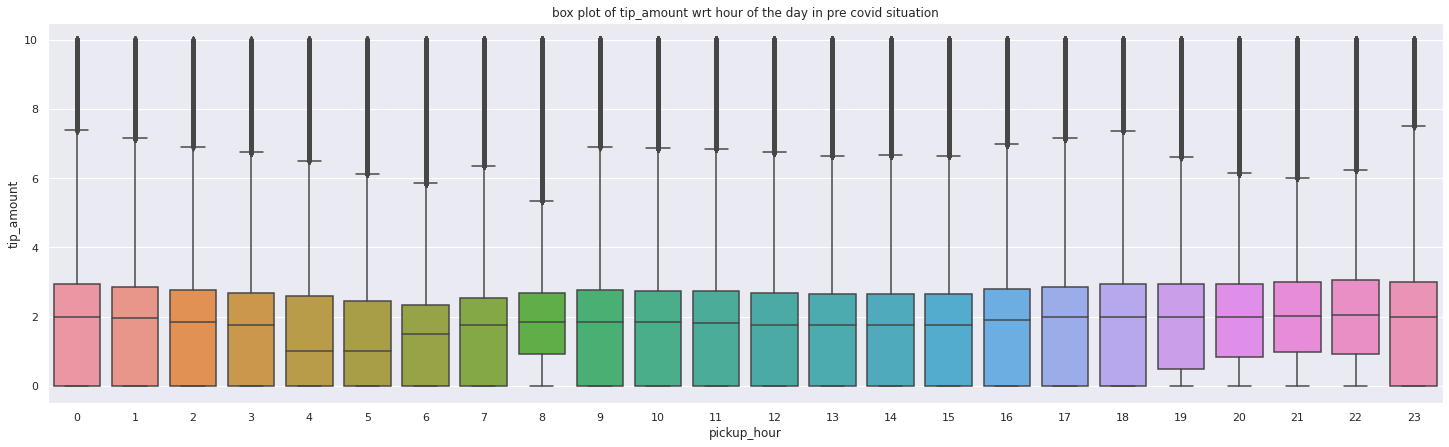

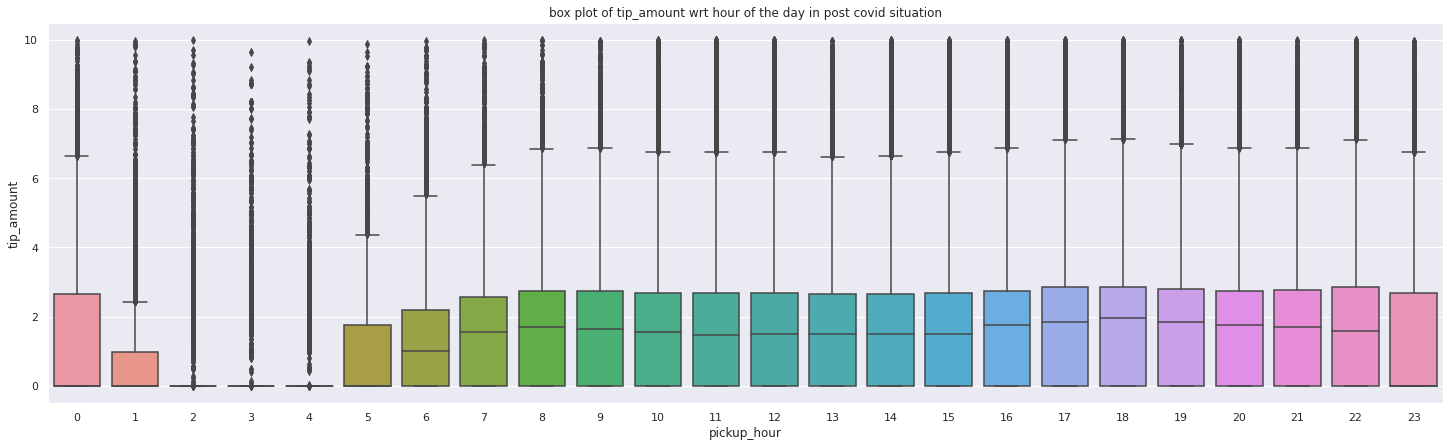

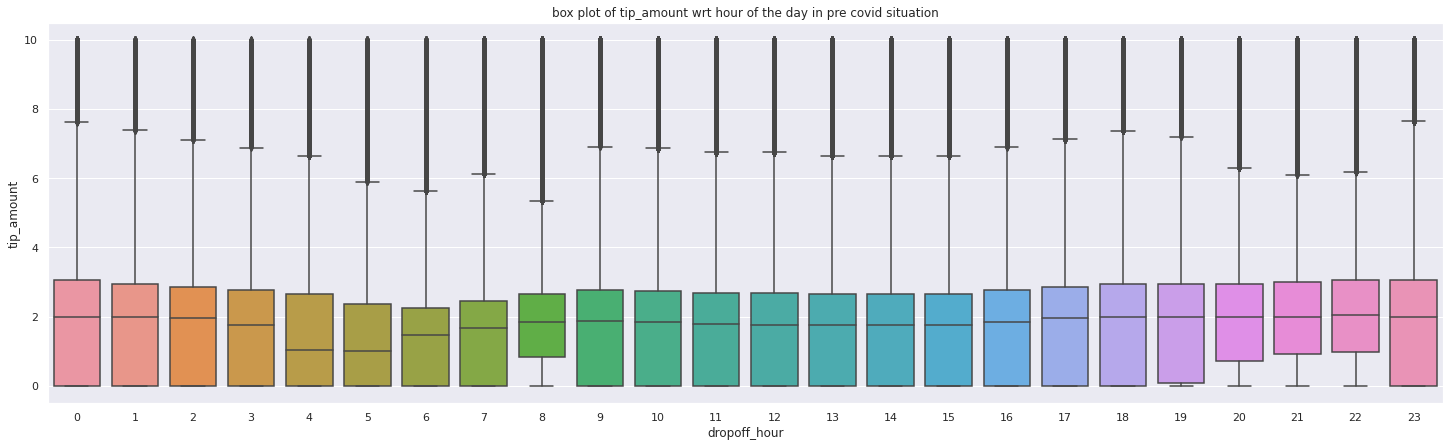

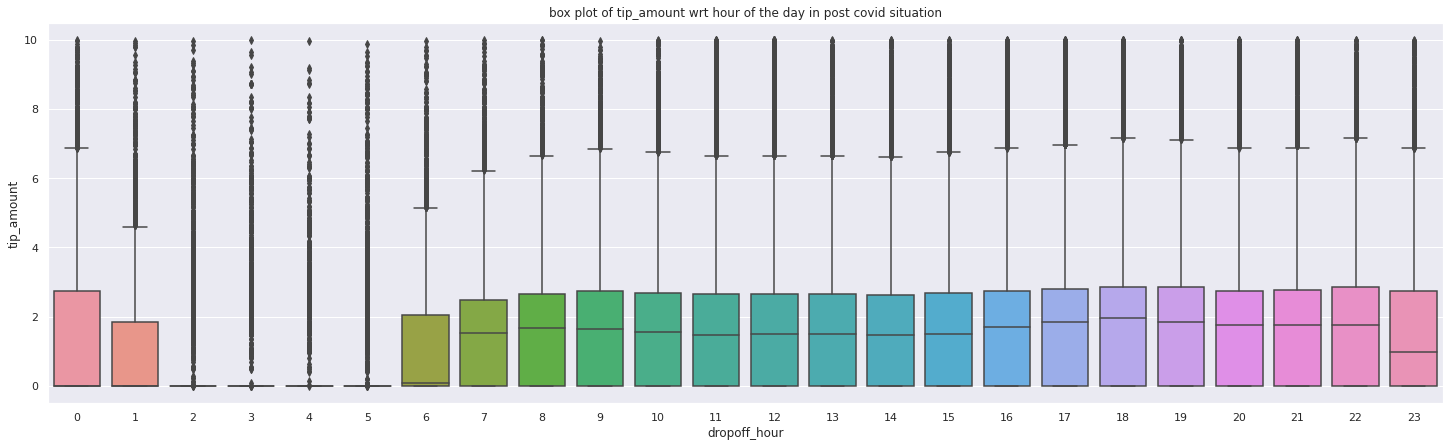

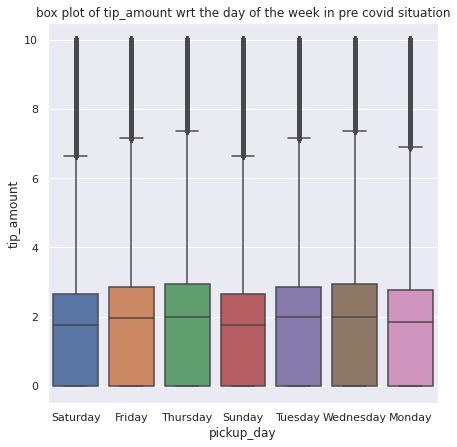

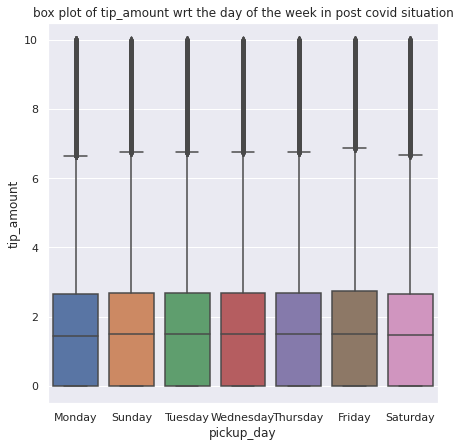

In [ ]:
#tip amount data cleaning and  various plot grpah wrt to tip amount 
restricted_tip_amount_data_feb_month = yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax.loc[yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax['tip_amount']<10]
restricted_tip_amount_data_june_month = yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom.loc[yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom['tip_amount']<10]
#plot graph between Tip amount and pick up hours in pre covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'pickup_hour',y='tip_amount',data=restricted_tip_amount_data_feb_month,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day in pre covid situation')
sns.set()
plt.show()
#plot graph between Tip amount and pick up hours in post covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'pickup_hour',y='tip_amount',data=restricted_tip_amount_data_june_month,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day in post covid situation')
sns.set()
plt.show()

#plot graph between Tip amount and drop off hours in pre covid situation

fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'dropoff_hour',y='tip_amount',data=restricted_tip_amount_data_feb_month,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day in pre covid situation')
sns.set()
plt.show()

#plot graph between Tip amount and drop off hours in post covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'dropoff_hour',y='tip_amount',data=restricted_tip_amount_data_june_month,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day in post covid situation')
sns.set()
plt.show()

#plot graph between Tip amount and pick up day  in pre covid situation
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'pickup_day',y='tip_amount',data=restricted_tip_amount_data_feb_month,ax=ax)
ax.set_title('box plot of tip_amount wrt the day of the week in pre covid situation')
sns.set()
plt.show()

#plot graph between Tip amount and pick up day in post covid situation
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'pickup_day',y='tip_amount',data=restricted_tip_amount_data_june_month,ax=ax)
ax.set_title('box plot of tip_amount wrt the day of the week in post covid situation')
sns.set()
plt.show()


# **Data analysis of various features WRT to total tax in datasets**

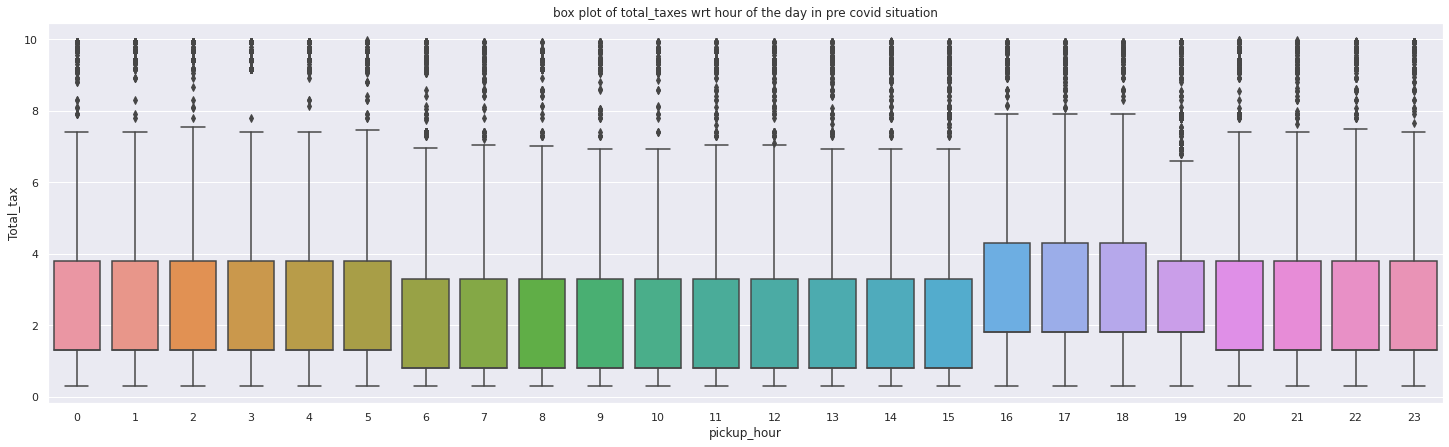

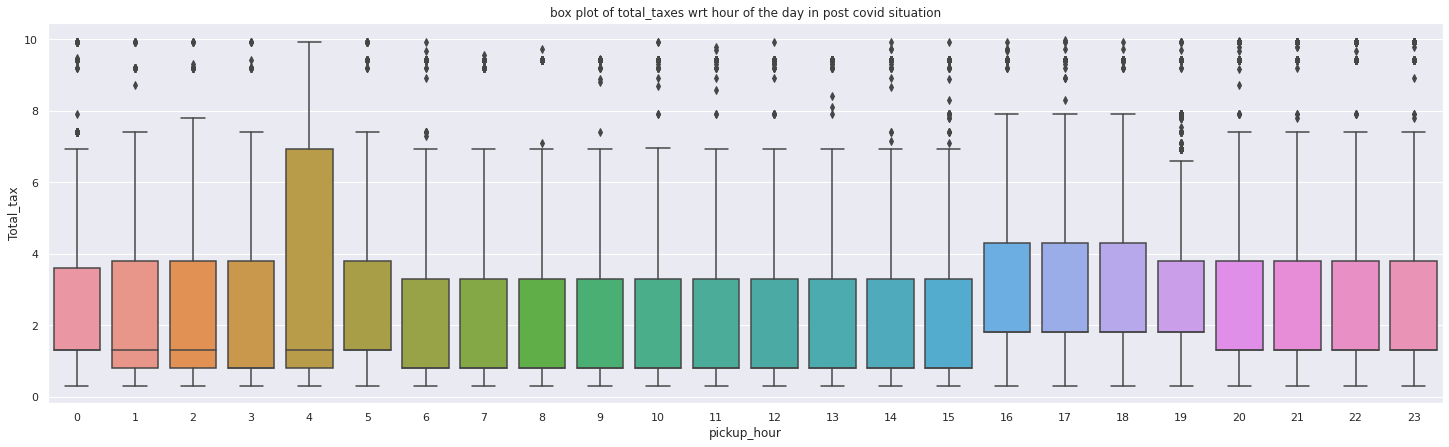

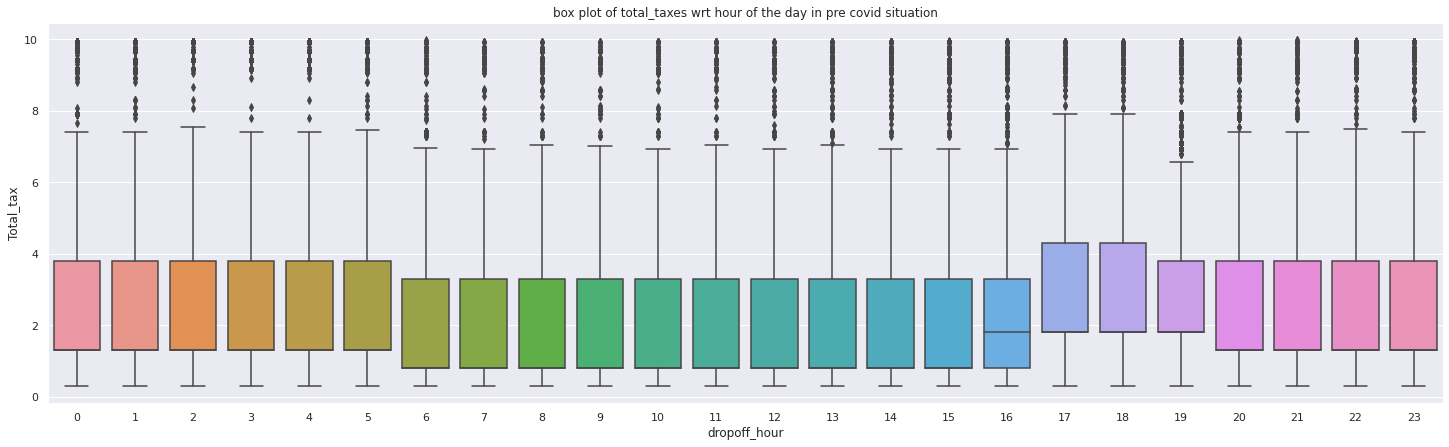

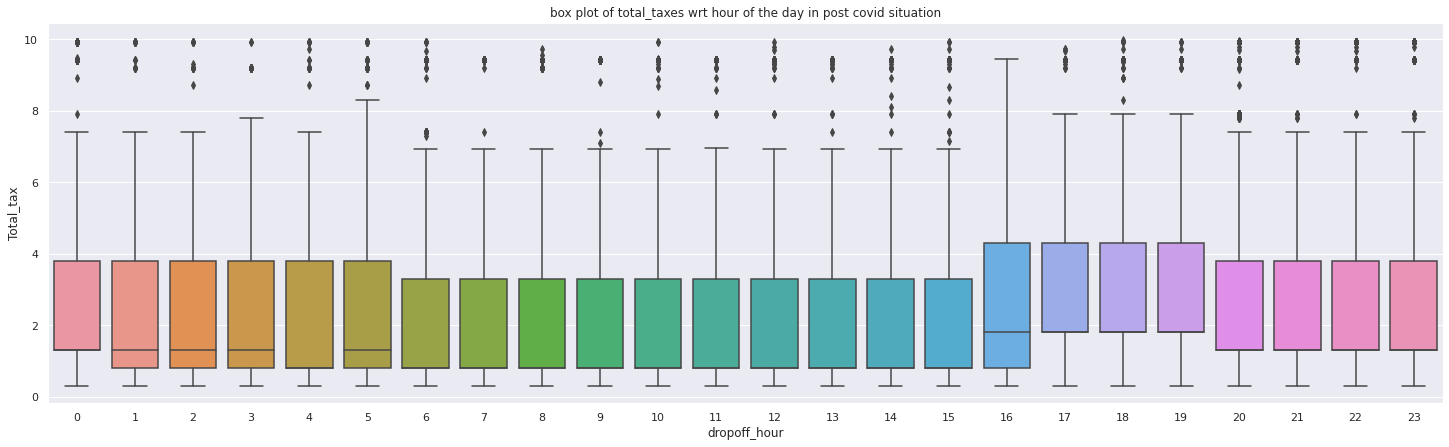

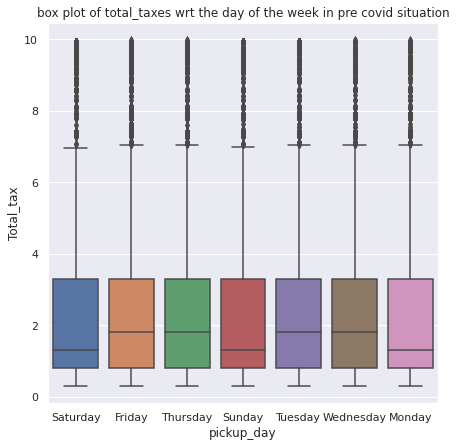

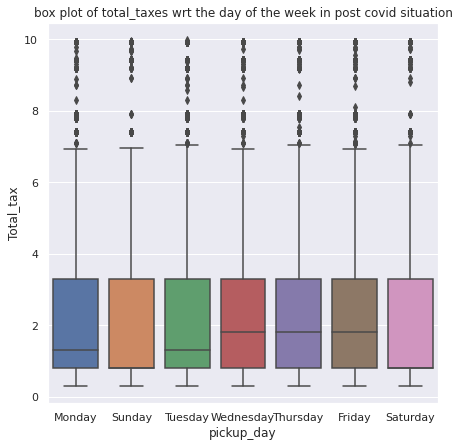

In [ ]:
#Total tax data visualisation
# total_taxes = extra + improvement_surcharges + Mta
restricted_total_taxes_data_feb_month = yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax.loc[yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax['Total_tax']<10]
restricted_total_taxes_data_june_month = yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom[yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom['Total_tax']<10]

#plot graph between Total tax and pick up hours in pre covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'pickup_hour',y='Total_tax',data=restricted_total_taxes_data_feb_month,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day in pre covid situation')
sns.set()
plt.show()

#plot graph between Total tax and pick up hours in post covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'pickup_hour',y='Total_tax',data=restricted_total_taxes_data_june_month,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day in post covid situation')
sns.set()
plt.show()

#plot graph between Total tax and drop off hours in pre covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'dropoff_hour',y='Total_tax',data=restricted_total_taxes_data_feb_month,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day in pre covid situation')
sns.set()
plt.show()

#plot graph between Total tax and drop off hours in post covid situation
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'dropoff_hour',y='Total_tax',data=restricted_total_taxes_data_june_month,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day in post covid situation')
sns.set()
plt.show()

#plot graph between Total tax and pick up day in pre covid situation
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x ='pickup_day',y='Total_tax',data=restricted_total_taxes_data_feb_month,ax=ax)
ax.set_title('box plot of total_taxes wrt the day of the week in pre covid situation')
sns.set()
plt.show()

#plot graph between Total tax and pick up day in post covid situation
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x ='pickup_day',y='Total_tax',data=restricted_total_taxes_data_june_month,ax=ax)
ax.set_title('box plot of total_taxes wrt the day of the week in post covid situation')
sns.set()
plt.show()


# **Data analysis of Duration of minutes WRT to various features in datasets**

In [ ]:
#plot graph between duration of minutes and pick up hours
restricted_duration_in_minutes_feb_month = yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax.loc[yellow_tripdata_feb_remove_nan_remove_negative_values_dom_and_Total_tax['duration in minutes']<50]
restricted_duration_in_minutes_june_month = yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom.loc[yellow_tripdata_june_remove_nan_remove_negative_values_with_total_tax_and_dom['duration in minutes']<50]

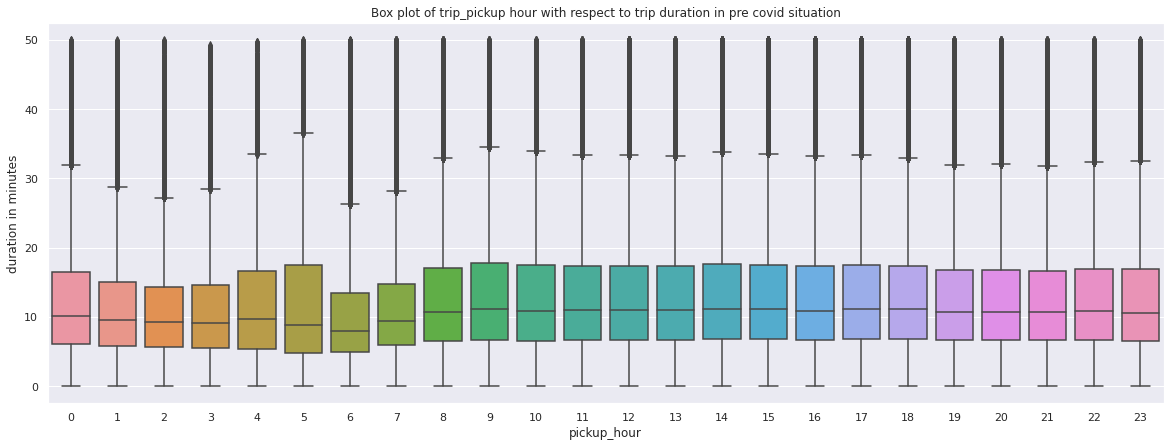

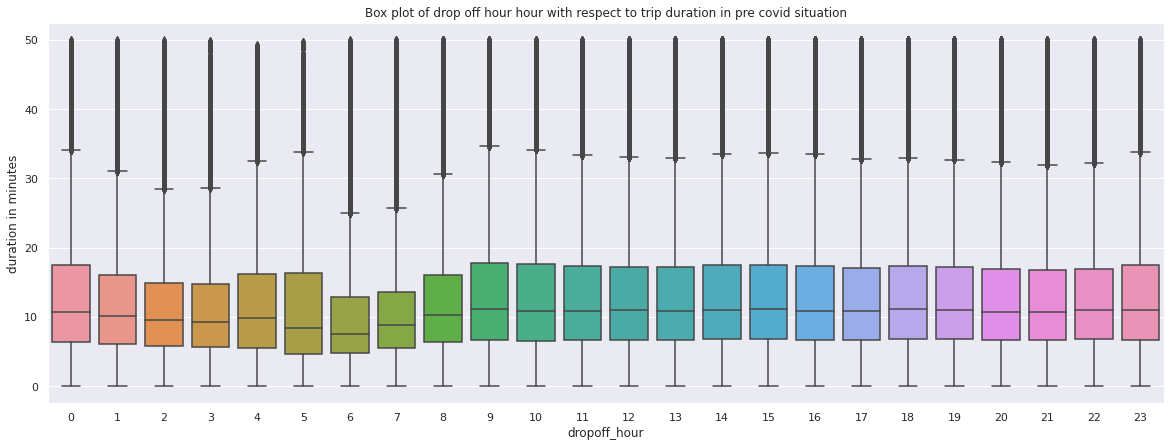

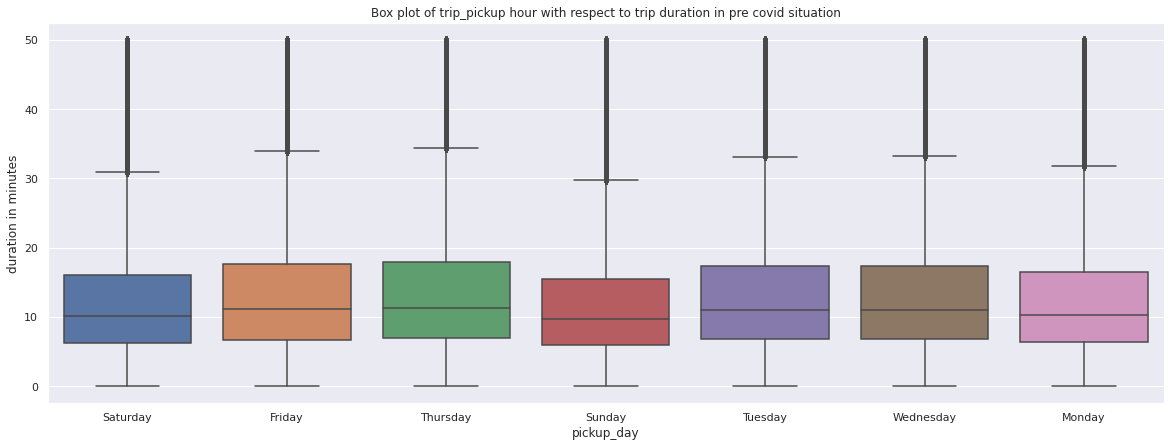

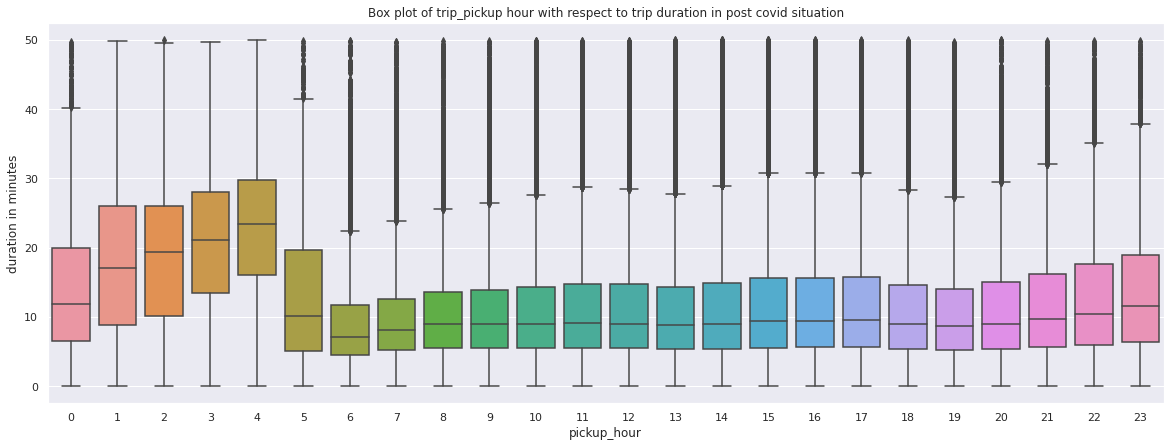

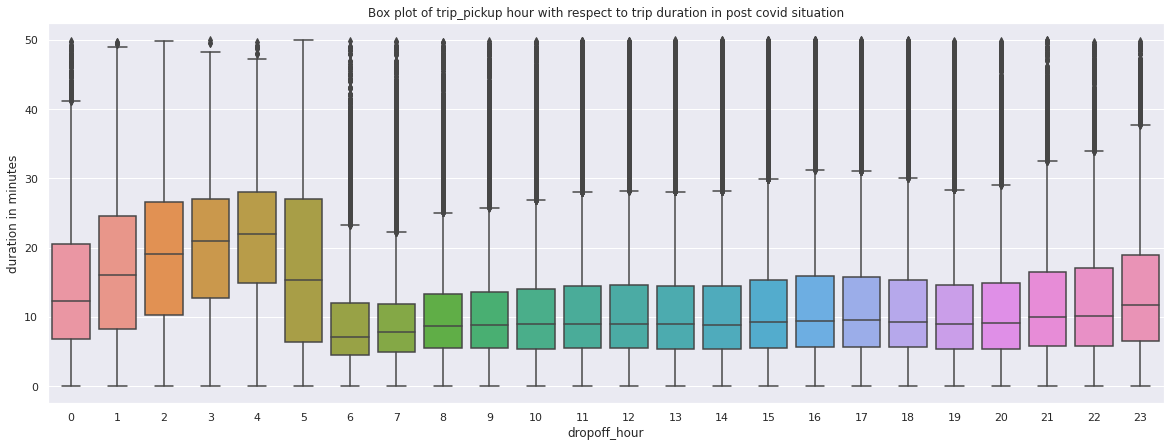

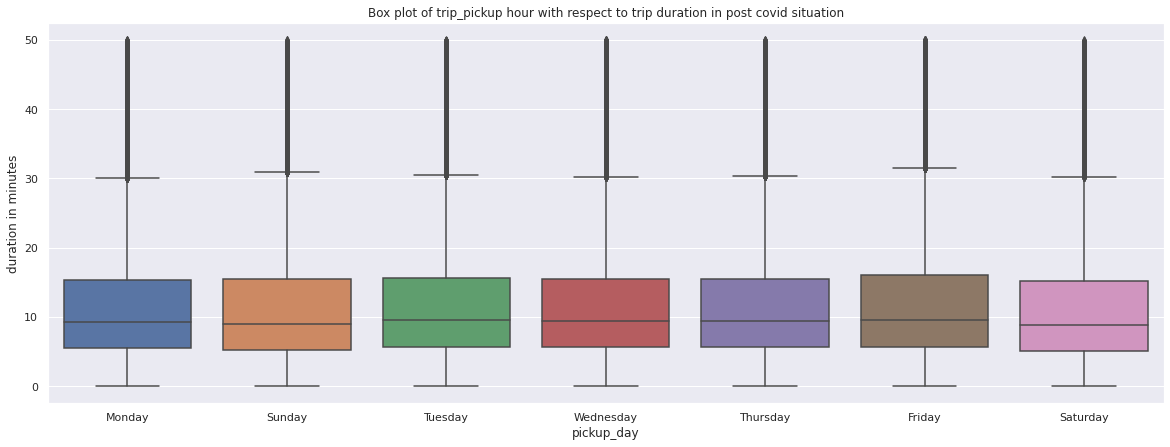

In [ ]:
#plot graph between duration of minutes and pick up hours in pre covid situation
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'pickup_hour', y='duration in minutes',data = restricted_duration_in_minutes_feb_month,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration in pre covid situation')
sns.set()
plt.show()

#plot graph between duration of minutes and drop off hours in pre covid situation
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'dropoff_hour', y='duration in minutes',data = restricted_duration_in_minutes_feb_month,ax=ax)
ax.set_title('Box plot of drop off hour hour with respect to trip duration in pre covid situation')
sns.set()
plt.show()


#plot graph between duration of minutes and pick up day in pre covid situation
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'pickup_day', y='duration in minutes',data = restricted_duration_in_minutes_feb_month,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration in pre covid situation')
sns.set()
plt.show()

#plot graph between duration of minutes and pick up hours in post covid situation
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'pickup_hour', y='duration in minutes',data = restricted_duration_in_minutes_june_month,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration in post covid situation')
sns.set()
plt.show()

#plot graph between duration of minutes and drop off hours in pre covid situation
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'dropoff_hour', y='duration in minutes',data = restricted_duration_in_minutes_june_month,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration in post covid situation')
sns.set()
plt.show()

#plot graph between duration of minutes and drop off hours in pre covid situation
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'pickup_day', y='duration in minutes',data = restricted_duration_in_minutes_june_month,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration in post covid situation')
sns.set()
plt.show()


# **Analysis :-2 Fare amount comparision ** 
1. 5 dollar to 10 dollar are most collecting amount in pre covid and post covid situations.
2. during post covid situation no of trip less than pre covid situation.
3. 10 dollar is mostly paid by customer in both situaltion. **it concludes that short ride mostly adaptable by customer.**
**bold text** **Analysis:3 Tip amount**
1. 1 to 2 dollar tip given by customer in both situations.
2. largest amount 6 dollar got by driver in both  situations.
# **Analysis:-4 Total tax**
1. toal tax is sum up MTA Tax, insurgencece and other tax.
2. 1 dollar is collected in terms of taxes(both situations).
3.  it is observed that betweeen 2 to 3 dollar are not collected in terms of taxes in pre covid and post covid situation.
# **Analysis:-5 Duration of minute**
1. 5 to 10 minutes riding is mostly happen in both situation.
2. 15 to 20 minute ride is rarely happen in both situation.
# **Analysis:-6 trip distance**
1. during 5 to 10 minute ride 2 miles covered in pre covid and post covd situation.
2. 4 to 12 mile covered 15 to 35 minute riding (approximately both situation).
# **Analysis:-7 Toll amount**
1. 0.5 dollar collected in post covid siuation but no toll amount collected in pre covid situation.
2. Upto 6 dollar also collected during post covid situation.
# **Analysis:-8 Payment type **
1. credit card is mostly adaptable payment method choose by customer.
2. cash is second most adaptable method. other method are rarely choose.
3. Voided trip is sometimes happen in post covid situation.
# **Analysis:9 Pickup hour **
1. 2 pm to 4 pm are busiest hour in post covid situation but 5 pm to 7 pm are busiest hour in pre covid situation.
2. 2 am to 4 am are idle time for driving.(both situation)
# **Analysis:10 Pickup day **
1. Saturday is most busy day in pre covid situation but Tuesday is busy day in post covid situation.
2. Friday is busy day in both situation.
# **Analysis:11 routes location **
1. five best routes (pre covid situation)
237-236,236-236,236-237,237-237,264-264
five best route (post covid situation)
264-264,237-236,236-237,236-236,75-74
# **Analysis :- 12(Fare amount vs Pickup hours/drop hours/Pick up day)**
1. frequent fare amount is 10 dollar for whole day in pre covid situation and 5 dollar for post covid situation.(pick up and drop off hours)
2. highest median value in both dataset are 40 dollar.(pick up and drop off hours)
3. large number of outliers present in pre covid situation.
4. median value is same for both situation is almost 10 dollar.
# **Analysis :- 13(total amount/total tax/duration of minutes/tip amount  vs Pickup hours/drop hours/Pick up day)**
1. largest frequent  value at  4 am in both situations.
2. median value during pick up hour/drop off hour are same.
3. total amount value is same for both situation which is above 10 dollar.
4. In both situation less than 2 dollar generate via tax.
5. 10 minutes is ride time for all situation.
6. 20 minutes is largest time of ride in both situation.
7. tip amount is 2 dollar in all situations.






Data merge with identity 